In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [33]:
import os
!python --version
print('conda environment: {}'.format(os.environ['CONDA_DEFAULT_ENV']))

Python 3.6.1 :: Continuum Analytics, Inc.
conda environment: astroconda35


In [4]:
from datetime import datetime as dt
print('Last edit on: {}'.format(dt.now()))

Last edit on: 2017-09-02 07:51:24.938109


# Tutorial 3 | Astronomy Series: Exoplanet demographics with ML

In this tutorial, we will learn how to:
* use scikit-learn to implement basic machine learning models

Note: If you want to run the following Python scripts, please make sure you have Python and Jupyter notebook installed. If you are unsure how to do this, check out our [another tutorial](https://jpdeleon.github.io/2016-11-29-Python-Set-up/) on how to set-up your machine. Check also the first part of this tutorial series [here](https://jpdeleon.github.io/2016-12-05-Exoplanet-Goldrush/).

In [5]:
# Python 2 and 3 compatible
try:
    from urllib.request import urlopen, Request
    from urllib.error import HTTPError
except ImportError:
    from urllib2 import urlopen, Request, HTTPError
import time
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

url = 'http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets'
pl_params = "pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,pl_radj,pl_radjerr1,pl_radjerr2,pl_dens,pl_instrument,pl_insol,pl_eqt,"
pl_err = 'pl_bmassjerr1,pl_bmassjerr2,pl_bmassjerr1,pl_bmassjerr2,pl_orbpererr1,pl_orbpererr2,'
st_params = "st_optmag,ra,dec,st_dist,st_teff,st_mass,st_rad,st_plx,gaia_plx,gaia_dist,st_pm,gaia_pm,st_radv,st_spstr,st_logg,st_lum,st_dens,st_metfe,st_age,st_acts,st_bmvj,st_jmh2,"
others = 'pl_instrument,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink,st_j,st_h,st_k'
full_url= url+'&select='+ pl_params + pl_err + st_params+others

response = urlopen(full_url)
html = response.read()

outpath_extended = 'confirmed_planets_extended_{}.csv'.format(time.strftime("%Y%m%d")) #include date of download

print("Downloading data from URL:\n{}".format(url))

with open('data/'+outpath_extended,'wb') as f:
     f.write(html)
print("Saved file as {}".format(outpath_extended))

http://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=exoplanets
Saved file as confirmed_planets_extended_20170902.csv


In [6]:
import pandas as pd

df = pd.read_csv('data/'+outpath_extended)
df.head(3)

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,pl_instrument.1,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink,st_j,st_h,st_k
0,HD 1690,b,Radial Velocity,2010,1,533.0,1.30,0.640,NaN,6.10,...,HARPS Spectrograph,3.6 m ESO Telescope,2014-05-14,0,Moutou et al. 2011,Moutou et al. 2011,http://exoplanet.eu/catalog/hd_1690_b/,6.877,6.229,6.018
1,HD 1605,b,Radial Velocity,2015,2,577.9,1.48,0.078,NaN,0.96,...,Multiple Instruments,Multiple Telescopes,2015-04-01,0,Harakawa et al. 2015,Harakawa et al. 2015,http://exoplanet.eu/catalog/hd_1605_b/,5.850,5.375,5.272
2,HD 1666,b,Radial Velocity,2015,1,270.0,0.94,0.630,NaN,6.43,...,Multiple Instruments,Multiple Telescopes,2015-04-01,0,Harakawa et al. 2015,Harakawa et al. 2015,http://exoplanet.eu/catalog/hd_1666_b/,7.269,7.063,6.964


In [7]:
print('Number of Detected Planets per Technique:\n')
df['pl_discmethod'].value_counts()

Number of Detected Planets per Technique:



Transit                          2734
Radial Velocity                   646
Microlensing                       47
Imaging                            44
Transit Timing Variations          15
Eclipse Timing Variations           9
Orbital Brightness Modulation       6
Pulsar Timing                       5
Pulsation Timing Variations         2
Astrometry                          1
Name: pl_discmethod, dtype: int64

# Pairplots
This is a powerful way to survey relationship among variables. A particular scattered pairplot implies no correlation while a distribution with a definite slope implies otherwise. Be sure to try varying the keyword parameters.

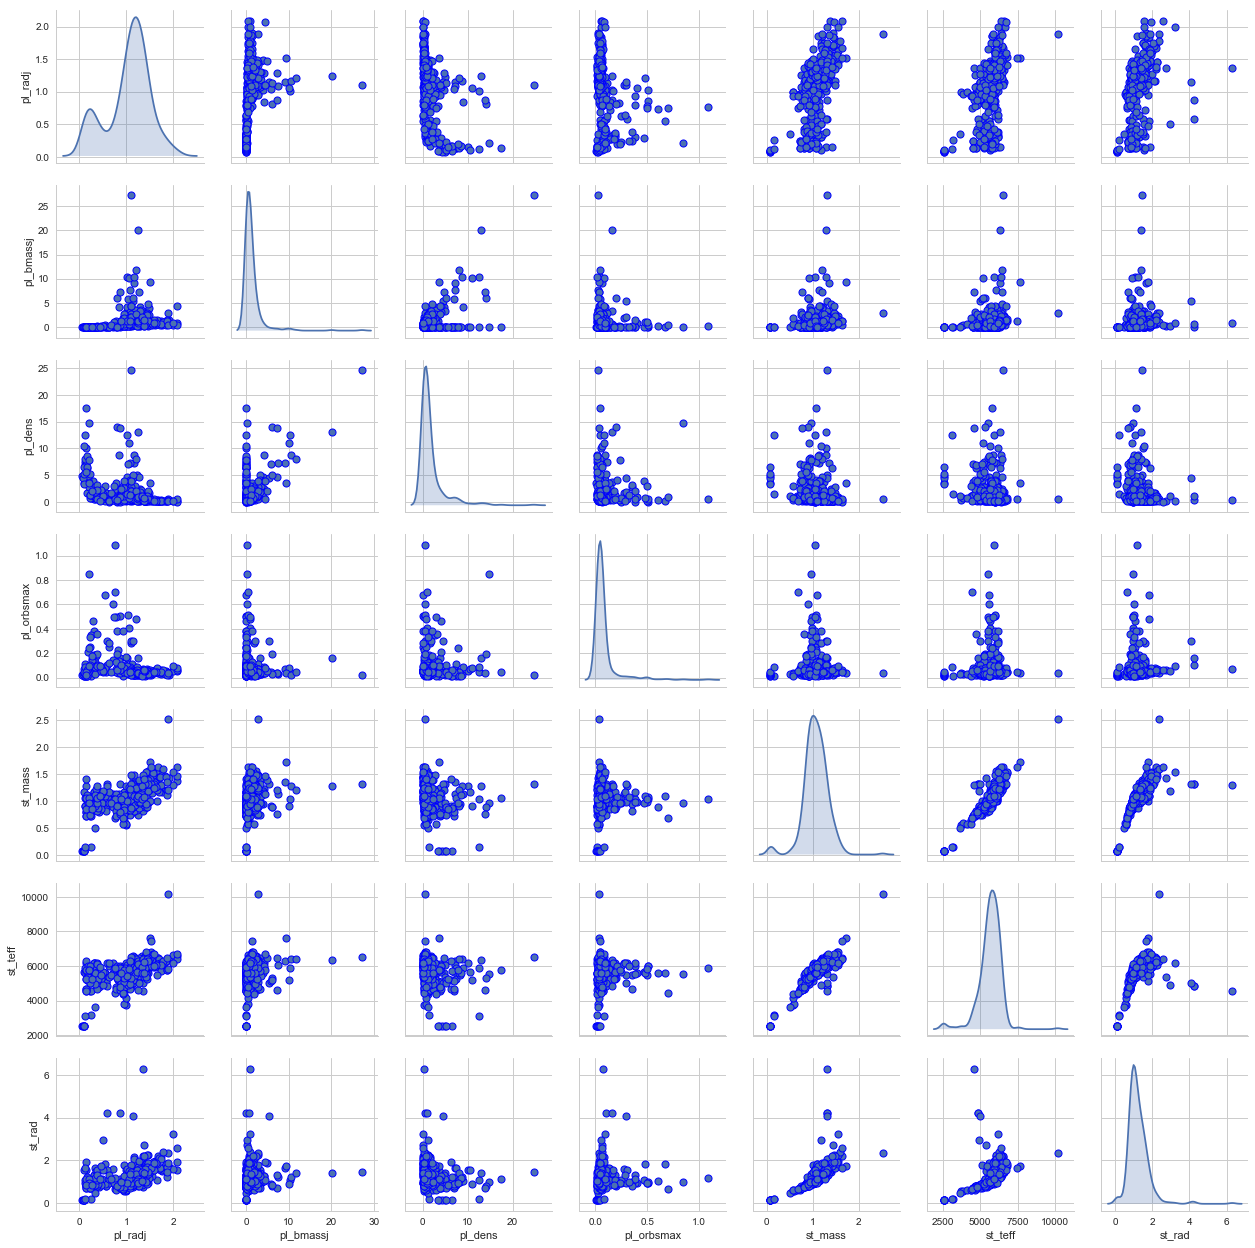

In [8]:
import seaborn as sb
sb.set_style('whitegrid')

params=df[['pl_radj', 'pl_bmassj', 'pl_dens', 'pl_orbsmax',"st_mass","st_teff","st_rad"]].dropna()
sb.pairplot(params, diag_kind="kde", plot_kws=dict(s=50, edgecolor="b", linewidth=1), diag_kws=dict(shade=True));

In [9]:
params.values.shape

(391, 7)

In [10]:
import numpy as np

X=params.values
Cov = np.cov(X.T)
Cov.shape

(7, 7)

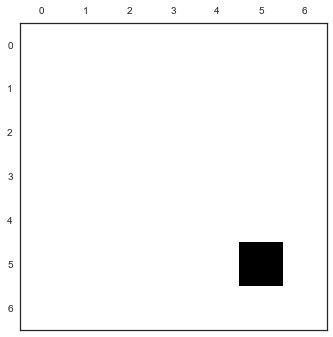

In [11]:
plt.style.use('seaborn-white')
plt.matshow(Cov)

In [12]:
eig_vals, eig_vecs = np.linalg.eig(Cov)
#eig_vals, eig_vecs

In [13]:
#take eig value with largest value
idx = eig_vals.argsort()

Y = np.dot(X[:,idx],eig_vecs[idx]) # projection
# @ is dot product
# Y = X[:,idx] @ eig_vecs[idx] 

In [14]:
Y.shape

(391, 7)

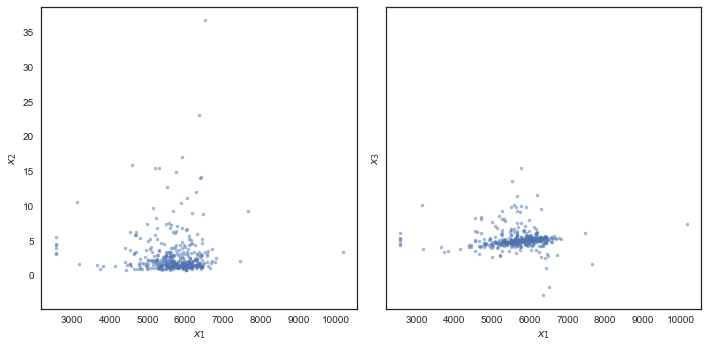

In [15]:
fig,axes = plt.subplots(1, 2, figsize=(10,5), sharex=True, sharey=True)

#1st and 2nd component
axes[0].plot(Y[:,0], Y[:,1], marker='.', alpha=0.5, linestyle='none')
#1st and 3rd component
axes[1].plot(Y[:,0], Y[:,2], marker='.', alpha=0.5, linestyle='none')

#axes[0].set_xlim(-10, 10)
#axes[0].set_ylim(-10, 10)

axes[0].set_xlabel('$x_1$')
axes[0].set_ylabel('$x_2$')
axes[1].set_xlabel('$x_1$')
axes[1].set_ylabel('$x_3$')

fig.tight_layout()

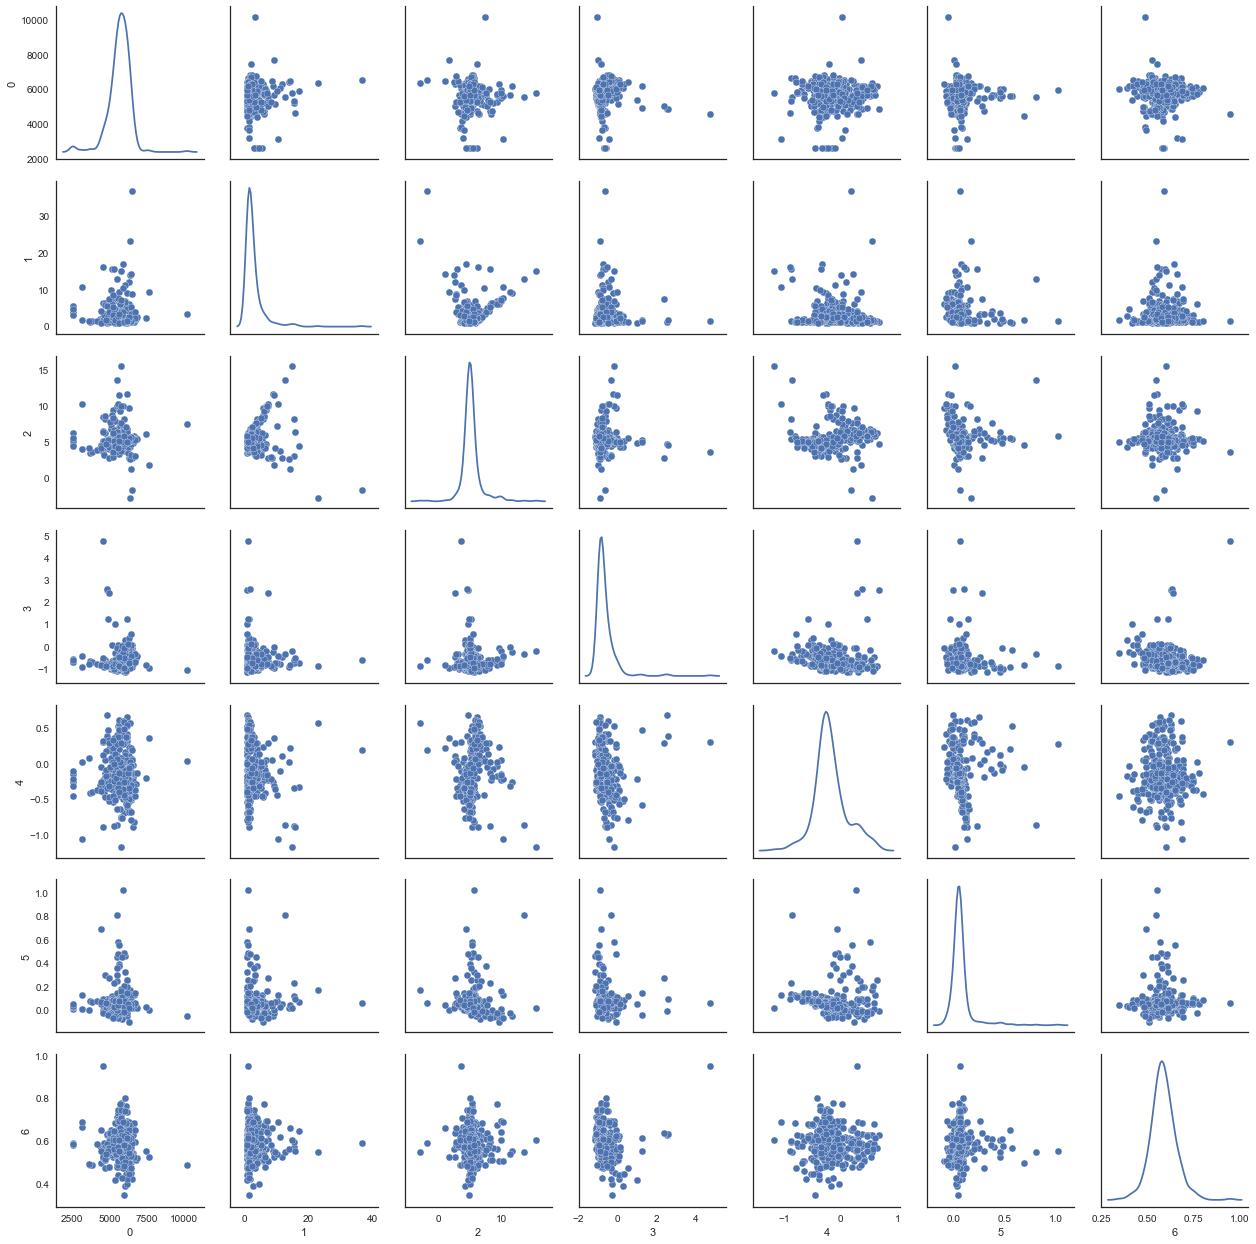

In [16]:
sb.pairplot(pd.DataFrame(Y), diag_kind='kde')

In [17]:
#eigenvectors
np.cumsum(eig_vals) / np.sum(eig_vals)

array([ 0.99997524,  0.99999499,  0.99999933,  0.99999981,  0.99999997,
        0.99999999,  1.        ])

In [18]:
X.shape

(391, 7)

In [19]:
from sklearn.decomposition import PCA

#preserve 90% of the variance
pca=PCA(2)

Xpca=pca.fit_transform(X)
Xpca.shape
#pca.fit(params)

(391, 2)

In [20]:
pca.components_

array([[  3.26424086e-04,   6.68599309e-04,  -6.20303735e-04,
          1.62783187e-06,   3.19665933e-04,   9.99999418e-01,
          3.51777044e-04],
       [ -2.86633664e-02,   5.83837206e-01,   8.11288761e-01,
          2.08547179e-04,  -2.15621599e-03,   1.26764913e-04,
         -1.08796197e-02]])

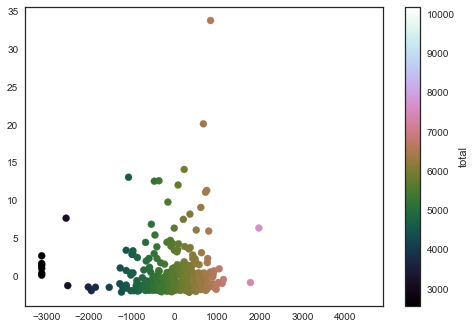

In [21]:
total = X.sum(axis=1)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=total,
            cmap='cubehelix')
plt.colorbar(label='total');
#plt.loglog()

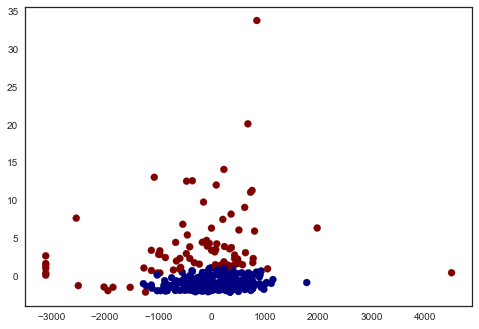

In [22]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(2, covariance_type='full', random_state=0)
gmm.fit(Xpca)

cluster_label = gmm.predict(Xpca)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=cluster_label, cmap='jet');

In [32]:
df.columns

Index(['pl_hostname', 'pl_letter', 'pl_discmethod', 'pl_disc', 'pl_pnum',
       'pl_orbper', 'pl_orbsmax', 'pl_orbeccen', 'pl_orbincl', 'pl_bmassj',
       'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_dens', 'pl_instrument',
       'pl_insol', 'pl_eqt', 'pl_bmassjerr1', 'pl_bmassjerr2',
       'pl_bmassjerr1.1', 'pl_bmassjerr2.1', 'pl_orbpererr1', 'pl_orbpererr2',
       'st_optmag', 'ra', 'dec', 'st_dist', 'st_teff', 'st_mass', 'st_rad',
       'st_plx', 'gaia_plx', 'gaia_dist', 'st_pm', 'gaia_pm', 'st_radv',
       'st_spstr', 'st_logg', 'st_lum', 'st_dens', 'st_metfe', 'st_age',
       'st_acts', 'st_bmvj', 'st_jmh2', 'pl_instrument.1', 'pl_telescope',
       'rowupdate', 'st_nplc', 'pl_def_refname', 'pl_disc_refname',
       'pl_pelink', 'st_j', 'st_h', 'st_k'],
      dtype='object')

In [29]:
#choose only params subset of df
df2=df.iloc[params.index.values]
#add unsupervised gmm labels
df2['cluster_label']=cluster_label
df2.head()

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink,st_j,st_h,st_k,cluster_label
39,HD 17156,b,Radial Velocity,2007,1,21.216630,0.16140,0.6819,87.89,3.2200,...,8.2 m Subaru Telescope,2014-10-29,16,Barbieri et al. 2009,Fischer et al. 2007,http://exoplanet.eu/catalog/hd_17156_b/,7.080,6.857,6.763,1
123,GJ 1214,b,Transit,2009,1,1.580405,0.01411,NaN,88.17,0.0197,...,0.4 m MEarth Telescope,2015-12-03,0,Harps&oslash;e et al. 2013,Charbonneau et al. 2009,http://exoplanet.eu/catalog/gj_1214_b/,9.750,9.094,8.782,1
129,HAT-P-2,b,Transit,2007,1,5.633473,0.06878,0.5171,86.72,9.0900,...,Canon 200mm f/1.8L,2014-05-14,0,Pal et al. 2010,Bakos et al. 2007,http://exoplanet.eu/catalog/hat-p-2_b/,7.796,7.652,7.603,1
130,HAT-P-3,b,Transit,2007,1,2.899736,0.03866,0.0000,87.07,0.5910,...,Canon 200mm f/1.8L,2014-05-14,3,Chan et al. 2011,Torres et al. 2007,http://exoplanet.eu/catalog/hat-p-3_b/,9.936,9.542,9.448,0
131,HAT-P-5,b,Transit,2007,1,2.788491,0.04075,0.0000,86.75,1.0600,...,Canon 200mm f/1.8L,2014-05-14,1,Bakos et al. 2007,Bakos et al. 2007,http://exoplanet.eu/catalog/hat-p-5_b/,10.844,10.522,10.481,0


In [ ]:
df2

## Questions:

1. What stellar properties determine hot Jupiter systems?
2. Planet-mass/metallicity relation
3. 

# Mass - Radius relation

See mass-radius relation.ipynb

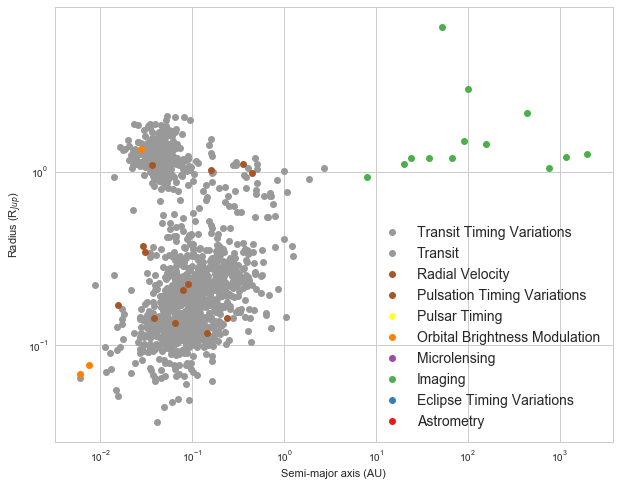

In [35]:
# import mpld3
# mpld3.enable_notebook()

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
#set plotting style
plt.style.use('seaborn-whitegrid')
#set font size
plt.rcParams.update({'font.size': 22})

import matplotlib.cm as cm

groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in list(zip(groups,colors))[::-1]: #plot in reverse order for visual clarity
    ax.plot(group[1]['pl_orbsmax'],group[1]['pl_radj'], 'o', 
            color=color,label=group[0]);#, alpha=0.3);
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Semi-major axis (AU)')
ax.set_ylabel('Radius (R$_{Jup}$)')
ax.legend(fontsize=14)

## clustering

[Machine Learning Map](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)

In [36]:
df_transit = groups.get_group('Transit')
#ma = df_transit[['pl_orbsmax', 'pl_bmassj']].dropna() #radius and mass
ma = df[['pl_orbsmax', 'pl_bmassj']].dropna() #radius and mass
ma.head()

,pl_orbsmax,pl_bmassj
0,1.300,6.10
1,1.480,0.96
2,0.940,6.43
3,2.230,6.11
4,0.044,0.48


In [37]:
len(ma)

1154

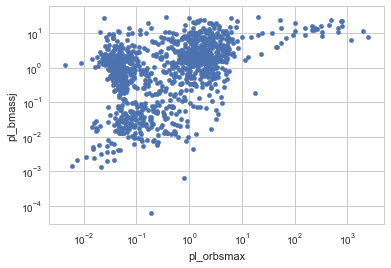

In [38]:
ma.plot(kind='scatter',x='pl_orbsmax',y='pl_bmassj',loglog=True)

## Unsupervised classification

In [44]:
from sklearn.decomposition import PCA

#preserve 90% of the variance
pca=PCA(3) #populations

Xpca=pca.fit_transform(ma)
Xpca.shape
#pca.fit(params)

(1154, 3)

In [55]:
Xpca[:,0]

array([-11.30336319, -11.16953969, -11.66038443, ..., -12.59774631,
       -12.56576516, -12.55576144])

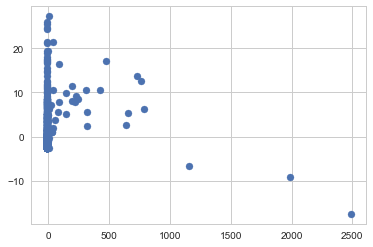

In [56]:
#total = X.sum(axis=1)
plt.scatter(Xpca[:, 0], Xpca[:, 1], #c=total,
            cmap='cubehelix')
#plt.colorbar(label='total');
#plt.loglog()

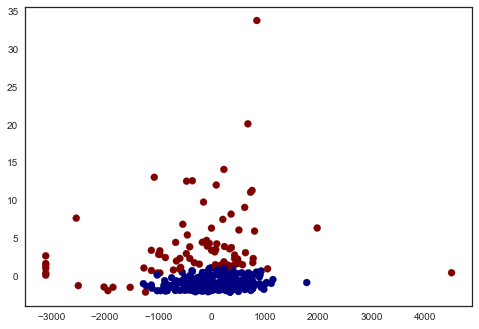

In [22]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(2, covariance_type='full', random_state=0)
gmm.fit(Xpca)

cluster_label = gmm.predict(Xpca)
plt.scatter(Xpca[:, 0], Xpca[:, 1], c=cluster_label, cmap='jet');

## Supervised learning

### KMeans

In [39]:
from sklearn.cluster import KMeans

n_clusters=2
km = KMeans(n_clusters)

km.fit(ma)
pred=km.predict(ma)

In [40]:
km.cluster_centers_

array([[    4.60679262,     2.58938265],
       [ 1162.625     ,    13.8855075 ]])

In [41]:
ma['group'] = pred
ma.head()

,pl_orbsmax,pl_bmassj,group
0,1.300,6.10,0
1,1.480,0.96,0
2,0.940,6.43,0
3,2.230,6.11,0
4,0.044,0.48,0


[0.001, 100.0, 0.001, 100.0]

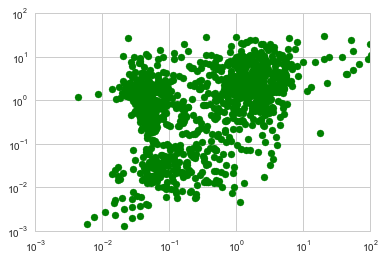

In [42]:
colors='g,b,r'.split(',')
for i in range(3):
    g=ma[ma['group']==i]
    plt.scatter(g['pl_orbsmax'],g['pl_bmassj'],c=colors[i])
plt.loglog()
plt.axis([1e-3,1e2,1e-3,1e2])
#plt.plot(km.cluster_centers_[0],'ro')

[0.001, 100.0, 0.001, 100.0]

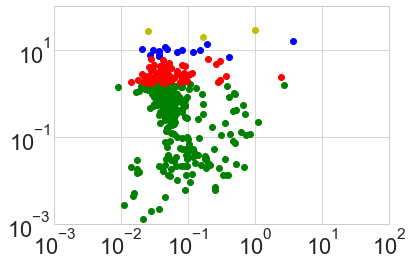

In [30]:
from sklearn.cluster import KMeans

n_clusters=4
km = KMeans(n_clusters)

km.fit(ma)
pred=km.predict(ma)
ma['group']=pred

colors='g,b,r,y,m,c'.split(',')
for i in range(n_clusters):
    g=ma[ma['group']==i]
    plt.scatter(g['pl_orbsmax'],g['pl_bmassj'],c=colors[i])
plt.loglog()
plt.axis([1e-3,1e2,1e-3,1e2])
#plt.plot(km.cluster_centers_[0],'ro')

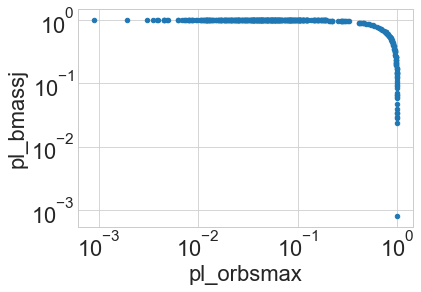

In [16]:
from sklearn.preprocessing import normalize

df_transit = groups.get_group('Transit')
ma = df_transit[['pl_orbsmax', 'pl_bmassj']].dropna()

ma_normed=pd.DataFrame(normalize(ma))
ma_normed.columns = ['pl_orbsmax', 'pl_bmassj']

ma_normed.plot(kind='scatter',x='pl_orbsmax',y='pl_bmassj',loglog=True)

[0.001, 100.0, 0.001, 100.0]

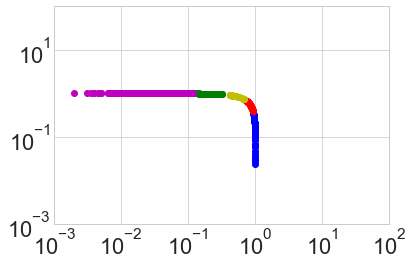

In [18]:
n_clusters=5
km = KMeans(n_clusters)
km.fit(ma_normed)
pred=km.predict(ma_normed)
ma_normed['group']=pred

colors='g,b,r,y,m,c'.split(',')
for i in range(n_clusters):
    g=ma_normed[ma_normed['group']==i]
    plt.scatter(g['pl_orbsmax'],g['pl_bmassj'],c=colors[i])
plt.loglog()
plt.axis([1e-3,1e2,1e-3,1e2])

### GMM

[0.001, 100.0, 0.001, 100.0]

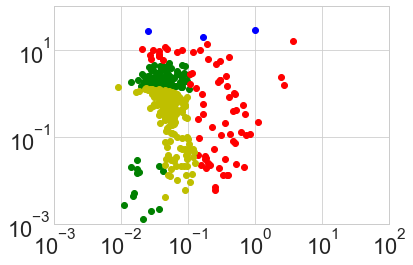

In [42]:
from sklearn.mixture import GaussianMixture

n_components=4
gmm = GaussianMixture(n_components)

df_transit = groups.get_group('Transit')
ma = df_transit[['pl_orbsmax', 'pl_bmassj']].dropna()
gmm.fit(ma)

pred=gmm.predict(ma)
ma['group']=pred

colors='g,b,r,y,m,c'.split(',')
for i in range(n_components):
    g=ma[ma['group']==i]
    plt.scatter(g['pl_orbsmax'],g['pl_bmassj'],c=colors[i])
plt.loglog()
plt.axis([1e-3,1e2,1e-3,1e2])
#plt.plot(km.cluster_centers_[0],'ro')

### Spectral Clustering

### MiniBatchKMeans

[0.001, 100.0, 0.001, 100.0]

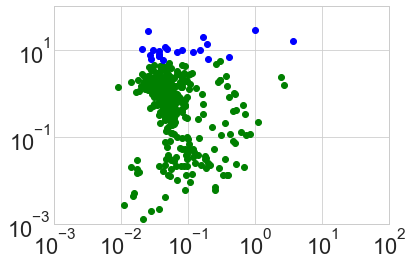

In [51]:
from sklearn.cluster import MiniBatchKMeans

n_clusters=2
mkm = MiniBatchKMeans(n_clusters)

df_transit = groups.get_group('Transit')
ma = df_transit[['pl_orbsmax', 'pl_bmassj']].dropna()
mkm.fit(ma)

pred=mkm.predict(ma)
ma['group']=pred

colors='g,b,r,y,m,c'.split(',')
for i in range(n_clusters):
    g=ma[ma['group']==i]
    plt.scatter(g['pl_orbsmax'],g['pl_bmassj'],c=colors[i])
plt.loglog()
plt.axis([1e-3,1e2,1e-3,1e2])
#plt.plot(km.cluster_centers_[0],'ro')

## Supervised learning

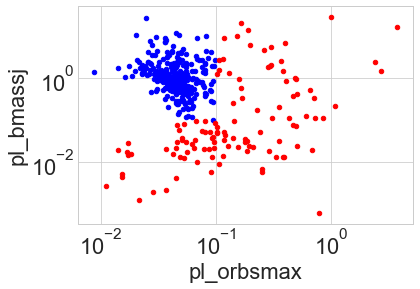

In [107]:
#force cut at M=0.1 Mj

df_transit = groups.get_group('Transit')
ma = df_transit[['pl_orbsmax', 'pl_bmassj']].dropna()

mass_cut = (ma['pl_bmassj'] > 0.1) & (ma['pl_orbsmax'] < 0.1)
ax=plt.subplot(1,1,1)
ma[mass_cut].plot(kind='scatter',x='pl_orbsmax',y='pl_bmassj',c='b',ax=ax, loglog=True) #HJ
ma[~mass_cut].plot(kind='scatter',x='pl_orbsmax',y='pl_bmassj',c='r',ax=ax, loglog=True)

In [108]:
from sklearn.model_selection import train_test_split

df_transit = groups.get_group('Transit')
ma = df_transit[['pl_orbsmax', 'pl_bmassj']].dropna()
X_train,X_test,y_train,y_test=train_test_split(ma,mass_cut,random_state=0)

In [114]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors=20
knn = KNeighborsClassifier(n_neighbors)

df_transit = groups.get_group('Transit')
ma = df_transit[['pl_orbsmax', 'pl_bmassj']].dropna()
knn.fit(X_train,y_train)
pred=knn.predict(ma)

[0.001, 100.0, 0.001, 100.0]

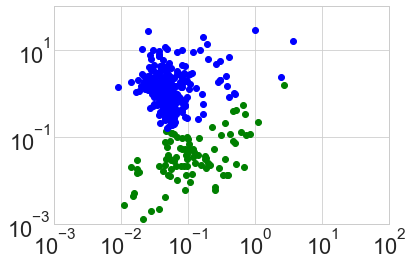

In [115]:
ma['group']=pred
colors='g,b,r,y,m,c'.split(',')
for i in range(n_clusters):
    g=ma[ma['group']==i]
    plt.scatter(g['pl_orbsmax'],g['pl_bmassj'],c=colors[i])
plt.loglog()
plt.axis([1e-3,1e2,1e-3,1e2])
#plt.plot(km.cluster_centers_[0],'ro')

In [ ]:
from sklearn.mixture import GaussianMixture
blobs=2
gmm =GaussianMixture(blobs)

gmm.fit(np.log(rm)) #log radius-mass space

## Planets with radius within Fulton gap, with unkown masses (for IRD) 

In [51]:
len(df.query("1.5 < pl_radj < 2")['pl_bmassj'])-len(df.query("1.5 < pl_radj < 2")['pl_bmassj'].dropna())

3

template for M dwarfs

In [52]:
df.query('pl_hostname == "K2-95"')['st_teff']

3267    3471.0
Name: st_teff, dtype: float64

## Fulton Gap
![img](https://www.spaceanswers.com/wp-content/uploads/2017/06/FultonHistogram.jpg)

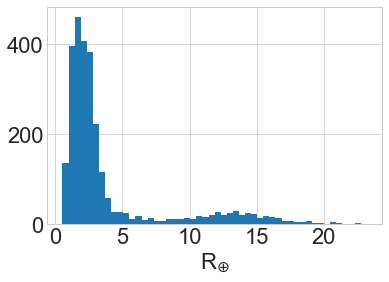

In [85]:
from astropy import constants as c
const=c.R_jup/c.R_earth

fig,ax = plt.subplots(1,1)
plt.hist(df.query('pl_discmethod == "Transit"')['pl_radj'].apply(lambda x: x*const), bins=50, normed=False); #.plot(kind='hist')
#plt.hist(df.query('pl_discmethod == "Radial Velocity"')['pl_bmassj'], bins=30, normed=False); #.plot(kind='hist')
plt.xlabel('R$_{\oplus}$')

## Surface gravity of exoplanets

* [Ballesteros and Luque](https://arxiv.org/pdf/1604.07725.pdf)

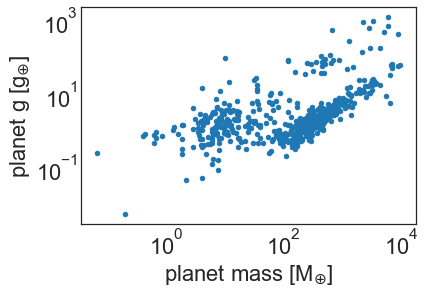

In [33]:
from astropy import constants as const

plt.style.use('seaborn-white')
M_J = const.M_jup #kg
R_J = const.R_jup #m
M_E = const.M_earth
R_E = const.R_earth
G=6.67408e-11 #m3 kg-1 s-2
g_E = G*M_E/R_E**2

fig=plt.figure(figsize=(5,5))
#convert to kg and m and then to Earth units
#GM/R**2
df['pl_bmass']=df['pl_bmassj']*M_J
df['pl_bmassE']=df['pl_bmassj']*M_J/M_E
df['pl_g_E']=G/g_E*(df['pl_bmassj']*M_J)/(df['pl_radj']*R_J)**2 #not pl_logg
df.plot(x='pl_bmassE',y='pl_g_E', kind='scatter', loglog=True)
#HAT-P-44 b
#plt.plot(hatp44b['pl_bmassE'],hatp44b['pl_g_E'], 'ro', ms=10)
plt.xlabel('planet mass [M$_{\oplus}$]')
plt.ylabel('planet g [g$_{\oplus}$]')

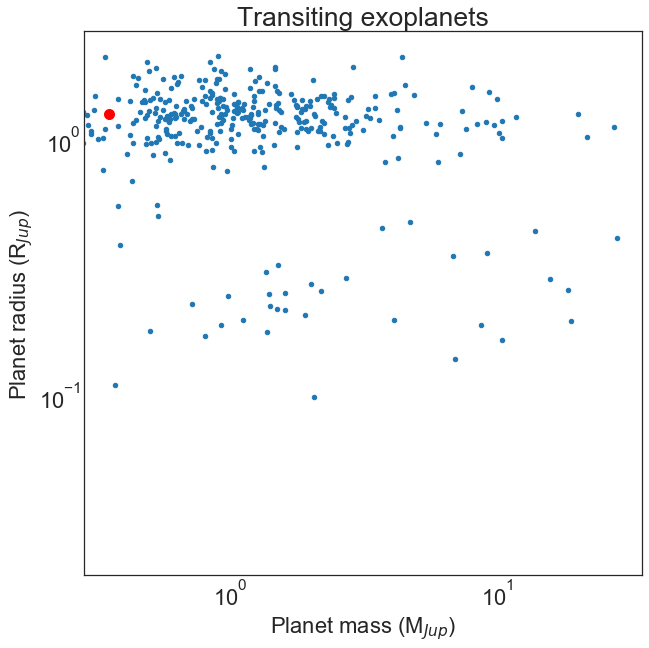

In [12]:
plt.style.use('seaborn-white')
fig,ax=plt.subplots(1,1,figsize=(10,10))
sample = df[df['pl_discmethod'] == 'Transit']
#HAT-P-44 b
sample.plot(x='pl_bmassj',y='pl_radj',kind='scatter',ax=ax)
#sample.plot(x='pl_orbsmax',y='pl_radj',kind='kde',ax=ax, ylim=(1e-2,1e2))
ax.plot(hatp44b['pl_bmassj'],hatp44b['pl_radj'], 'ro', ms=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Planet mass (M$_{Jup}$)')
ax.set_ylabel('Planet radius (R$_{Jup}$)')
ax.set_title('Transiting exoplanets')

Add [(surface) gravity](https://en.wikipedia.org/wiki/Surface_gravity) of solar system bodies from this [wiki page](https://en.wikipedia.org/wiki/List_of_Solar_System_objects_by_size).

`!pip install wikipedia
import wikipedia
w = wikipedia.page("List_of_Solar_System_objects_by_size")`

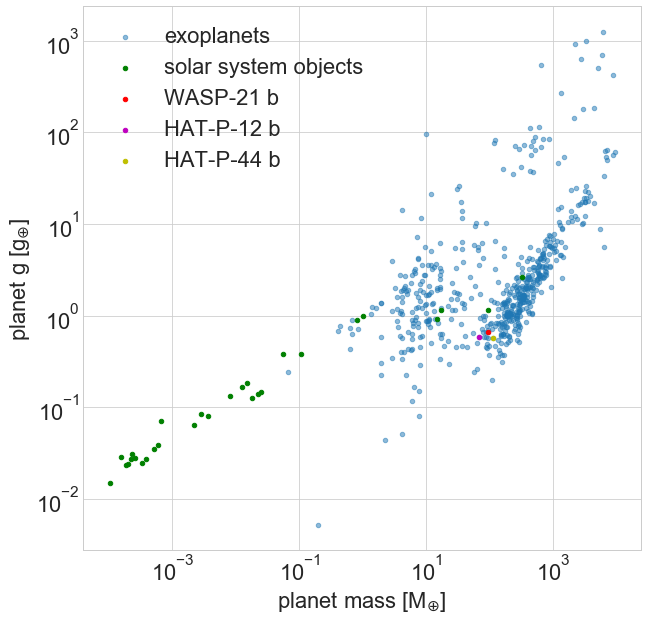

In [13]:
plt.rcParams.update({'font.size': 22})

names='Jupiter,Saturn,Uranus,Neptune,Earth,Venus,Mars,Ganymede,Titan,Mercury,Callisto,Io,Moon,Europa,Triton,Pluto,Eris,Titania,Rhea,Oberon,Iapetus,Haumea,Charon,Umbriel,Ariel,Dione,Quaoar,Tethys,Ceres'.split(',')
#km
radii=[69911, 58232, 25362, 24622, 6371, 6051.8, 3389.5, 2634.1, 2576, 2439.7, 2410.3, 1821.6, 1737.1, 1560.8, 1353.4, 1186, 1163, 788.4, 763.8, 761.4, 734.5, 620, 606, 584.7, 578.9, 561.4, 555, 531.1, 473]
# x 1e21 kg
masses=[1898600, 568460, 86832, 102430, 5973.6, 4868.5, 641.85, 148.2, 134.5, 330.2, 107.6, 89.3, 73.5, 48, 21.5, 13.105, 16.7, 3.526, 2.3166, 3.014, 1.9739, 4.006, 1.52, 1.2, 1.35, 1.096, 1.4, 0.6173, 0.939]

df_ss=pd.DataFrame({'name': names, 'mass': masses, 'radius': radii})
df_ss['massE']=df_ss['mass']*1e21/M_E
df_ss['g_E']=G/g_E*df_ss['mass']*1e21/(df_ss['radius']*1e3)**2

fig, ax = plt.subplots(1,1, figsize=(10,10))
df.plot(x='pl_bmassE',y='pl_g_E', kind='scatter', loglog=True, 
        ax=ax, alpha=0.5, label='exoplanets')
df_ss.plot(x='massE',y='g_E', kind='scatter', loglog=True, 
           color='g', ax=ax, label='solar system objects')

### low-surf log g
sample=["WASP-21","HAT-P-12","HAT-P-44"]
colors='r m y'.split()
for i,c in zip(sample, colors):
    p=df.query('pl_hostname == "{}"'.format(i))
    l = '{} b'.format(i)
    p.plot(x='pl_bmassE',y='pl_g_E', kind='scatter', loglog=True, 
           color=c, label=l, ax=ax)
#     if len(p['pl_letter']) > 1:
#         n='{0} {1}'.format(p['pl_hostname'].values[0], p['pl_letter'].values[0])
#         ax.text(p['pl_bmassj'].values[0], p['pl_g'].values[0], n)#, color='r')
plt.xlabel('planet mass [M$_{\oplus}$]')
plt.ylabel('planet g [g$_{\oplus}$]')

![surface gravity vs. mass relation](figures/g_vs_M_Ballesteros&Luque.png)

In [14]:
#from sklearn.linear_model import LinearRegression

from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df_ss['massE'],df_ss['g_E'])

print('slope\t\t={0}\nintercept\t={1}\nr-value\t\t={2}\np-value\t\t={3}\nstandard error\t={4}' \
      .format(slope, intercept, r_value, p_value, std_err))

slope		=0.00800423984913
intercept	=0.222107037463
r-value		=0.845746955298
p-value		=7.65058579343e-09
standard error	=0.000971853317946


In [83]:
import statsmodels.formula.api as sm
result = sm.ols(formula="pl_bmassE ~ pl_g_E", data=df).fit()
print result.params

Intercept    465.284187
pl_g_E         5.230233
dtype: float64


In [85]:
print result.summary()

                            OLS Regression Results                            
Dep. Variable:              pl_bmassE   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     117.6
Date:                Fri, 14 Jul 2017   Prob (F-statistic):           5.09e-25
Time:                        14:12:53   Log-Likelihood:                -4752.5
No. Observations:                 565   AIC:                             9509.
Df Residuals:                     563   BIC:                             9518.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    465.2842     46.703      9.963      0.0

In [78]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = df[['pl_bmassE','pl_g_E']].dropna().values

lr.fit(X[:,0].reshape(-1,1), X[:,1])
print('intercept: {0}, coeff:{1}'.format(lr.intercept_, lr.coef_))

intercept: -0.343691428643, coeff:[ 0.03304441]


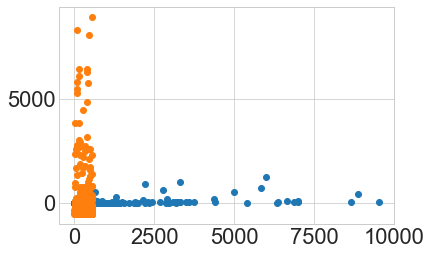

In [87]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

X=df[['pl_bmassE','pl_g_E']].dropna().values
pca.fit(X)
X_t = pca.transform(X)

plt.plot(X[:,0], X[:,1], 'o')
plt.plot(X_t[:,0], 'o')

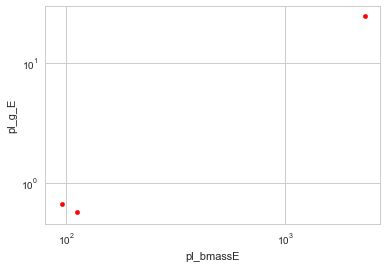

In [113]:
fig,ax=plt.subplots(1,1)
for i in ["WASP-21","HAT-P-20","HAT-P-44"]:
    p=df.query('pl_hostname == "{}"'.format(i))
    p.plot(x='pl_bmassE',y='pl_g_E', kind='scatter', #label=i, 
           loglog=True, color='r', ax=ax)
    #n='{0} {1}'.format(i, p['pl_letter'])
    #ax.text(p['pl_bmassj'], p['pl_g'], 'hello')

## Supervised learning for grouping planet population

use unsupervised learning to group transit planets into 2 blobs (in log radius-mass space).

In [9]:
groups.indices.keys()

dict_keys(['Astrometry', 'Eclipse Timing Variations', 'Imaging', 'Microlensing', 'Orbital Brightness Modulation', 'Pulsar Timing', 'Pulsation Timing Variations', 'Radial Velocity', 'Transit', 'Transit Timing Variations'])

In [10]:
df_transit = groups.get_group('Transit')
rm = df_transit[['pl_radj', 'pl_bmassj']].dropna() #radius and mass
rm.head()

,pl_radj,pl_bmassj
30,1.190,0.73000
32,1.399,0.67900
67,0.343,0.08495
74,1.300,1.90000
77,0.211,0.02152


In [34]:
len(rm)

533

In [11]:
from sklearn.mixture import GaussianMixture
blobs=2
gmm =GaussianMixture(blobs)

gmm.fit(np.log(rm)) #log radius-mass space

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [12]:
labels = gmm.predict(np.log(rm))
rm['gmm_group'] = labels.reshape(-1,1)
rm.head()

,pl_radj,pl_bmassj,gmm_group
30,1.190,0.73000,1
32,1.399,0.67900,1
67,0.343,0.08495,0
74,1.300,1.90000,1
77,0.211,0.02152,0


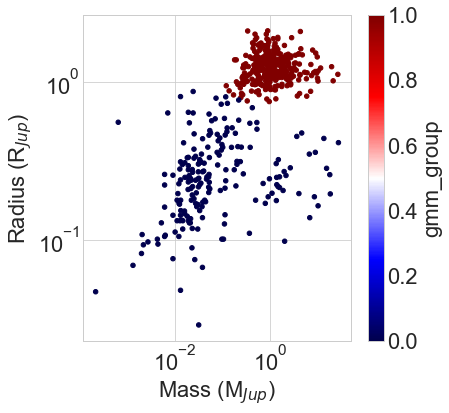

In [16]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
rm.plot.scatter(x='pl_bmassj',y='pl_radj',c='gmm_group',cmap='seismic',
                ax=ax, logx=True, logy=True)
ax.axis('tight')
#rm['pl_radj'].plot(kind='kde',c='g')
#rm['pl_bmassj'].plot(kind='kde',c='y')
ax.set_ylabel('Radius (R$_{Jup}$)')
ax.set_xlabel('Mass (M$_{Jup}$)')

In [26]:
#rm.index.values

In [30]:
df_transit.iloc(rm.index.values)

## Clustering
### Optimal number of clusters

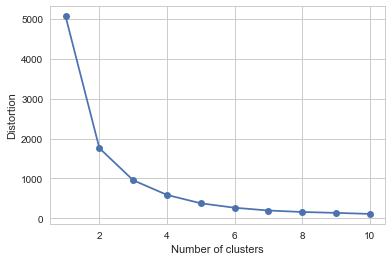

In [119]:
#using Kmeans

from  sklearn.cluster import KMeans
#Rule of thumb: Elbow method
#cluster dispersion for different values of k
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(rm)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.show()

In [120]:
kmeans = KMeans(n_clusters=6) #6 clusters used from plot above

kmeans.fit(rm.dropna())

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [121]:
new_labels = kmeans.predict(rm.dropna())
rm['kmeans_group'] = new_labels.reshape(-1,1)
rm.head()

,pl_radj,pl_bmassj,gmm_group,kmeans_group
11,0.236,0.117,0,2
12,0.385,0.250,0,2
24,1.281,0.662,1,0
25,1.242,0.352,1,0
27,1.426,0.892,1,0


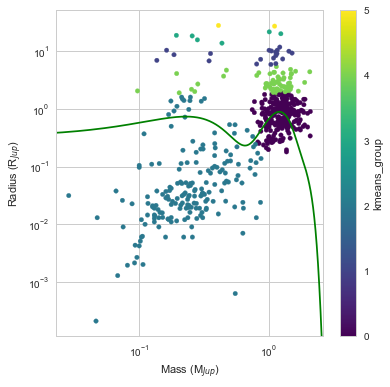

In [122]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
rm.plot.scatter(x='pl_radj',y='pl_bmassj',c='kmeans_group',cmap='viridis',
                ax=ax, logx=True, logy=True)
ax.axis('tight')
rm['pl_radj'].plot(kind='kde',c='g')
#rm['pl_bmassj'].plot(kind='kde',c='y')
ax.set_ylabel('Radius (R$_{Jup}$)')
ax.set_xlabel('Mass (M$_{Jup}$)')

## Hierarchical clustering

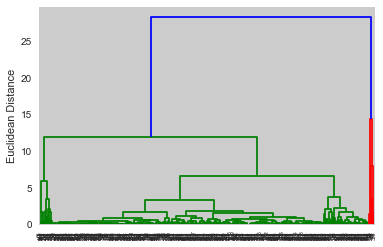

In [123]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

clusters = linkage(rm, 
                   metric='euclidean',
                   method='complete')

dendr = dendrogram(clusters)

plt.ylabel('Euclidean Distance');

In [124]:
from sklearn.cluster import AgglomerativeClustering

#6 clusters derived from Elbow method above
ac = AgglomerativeClustering(n_clusters=6,
                             affinity='euclidean',
                             linkage='complete')

new_labels = ac.fit_predict(rm.dropna())
rm['agg_group'] = new_labels.reshape(-1,1)
rm.head()

,pl_radj,pl_bmassj,gmm_group,kmeans_group,agg_group
11,0.236,0.117,0,2,2
12,0.385,0.250,0,2,2
24,1.281,0.662,1,0,2
25,1.242,0.352,1,0,2
27,1.426,0.892,1,0,2


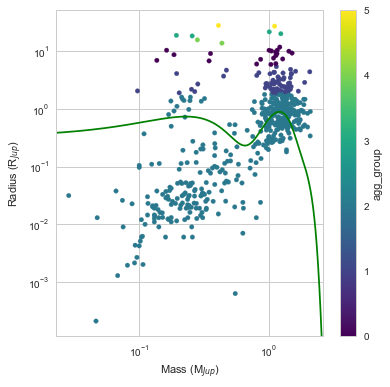

In [125]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
rm.plot.scatter(x='pl_radj',y='pl_bmassj',c='agg_group',cmap='viridis',
                ax=ax, logx=True, logy=True)
ax.axis('tight')
rm['pl_radj'].plot(kind='kde',c='g')
#rm['pl_bmassj'].plot(kind='kde',c='y')
ax.set_ylabel('Radius (R$_{Jup}$)')
ax.set_xlabel('Mass (M$_{Jup}$)')

## Density-based clustering
Density-based Spatial Clustering of Applications with Noise (DBSCAN)

In [126]:
from sklearn.cluster import DBSCAN

#note that no assumed clusters a priori
db = DBSCAN(eps=0.1,
            #min_samples=100,
            metric='euclidean')

new_label = db.fit_predict(rm)
rm['db_group'] = new_labels.reshape(-1,1)
rm.head()

,pl_radj,pl_bmassj,gmm_group,kmeans_group,agg_group,db_group
11,0.236,0.117,0,2,2,2
12,0.385,0.250,0,2,2,2
24,1.281,0.662,1,0,2,2
25,1.242,0.352,1,0,2,2
27,1.426,0.892,1,0,2,2


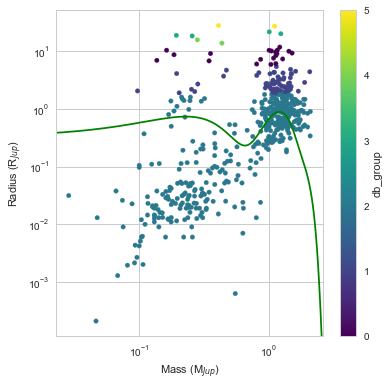

In [127]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
rm.plot.scatter(x='pl_radj',y='pl_bmassj',c='db_group',cmap='viridis',
                ax=ax, logx=True, logy=True)
ax.axis('tight')
rm['pl_radj'].plot(kind='kde',c='g')
#rm['pl_bmassj'].plot(kind='kde',c='y')
ax.set_ylabel('Radius (R$_{Jup}$)')
ax.set_xlabel('Mass (M$_{Jup}$)')

## PCA (linear dimensionality reduction)

In [128]:
radius_standardized = (df.pl_radj - df.pl_radj.mean()) / df.pl_radj.std()
mass_standardized = (df.pl_bmassj - df.pl_bmassj.mean()) / df.pl_bmassj.std()
mass_radius = zip(mass_standardized,radius_standardized)

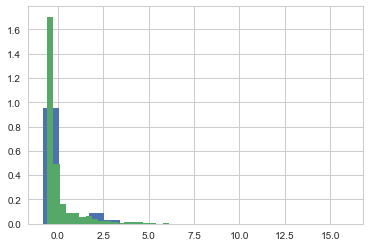

In [129]:
#n, bins, patches = plt.hist(x, 50, normed=1, facecolor='green', alpha=0.75)

plt.hist(radius_standardized.dropna(),bins=20, normed=1);
plt.hist(mass_standardized.dropna(),bins=20, normed=1);

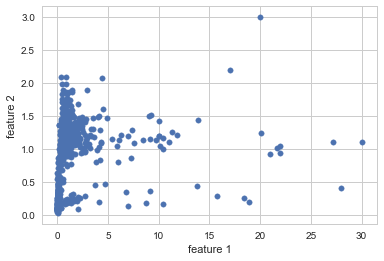

In [130]:
plt.scatter(df['pl_bmassj'],df['pl_radj'], s=30)
plt.xlabel("feature 1")
plt.ylabel("feature 2");

In [131]:
from sklearn.decomposition import PCA
pca = PCA()

data=df[['pl_bmassj','pl_radj','pl_orbsmax']].dropna() #3D
result = pca.fit(data)
data.shape

(452, 3)

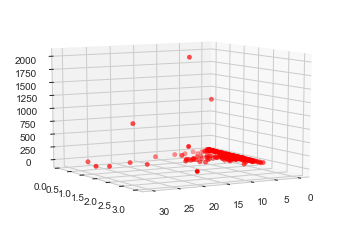

In [132]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

ax.scatter3D(data.pl_bmassj, data.pl_radj, data.pl_orbsmax, c='r')
ax.view_init(10, 60);

#animate: http://matplotlib.org/examples/animation/simple_3danim.html

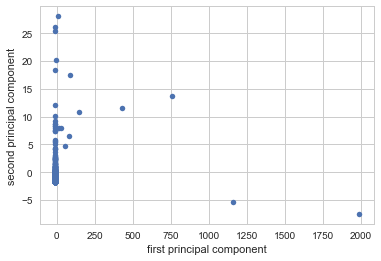

In [133]:
X_pca = pca.transform(data)

plt.scatter(X_pca[:, 0], X_pca[:, 1], linewidths=0, s=30)
plt.xlabel("first principal component")
plt.ylabel("second principal component");

if False:
    plt.xscale('log')
    plt.xlim([1e-3,1e4])

## Manifold learning (non-linear dimensionality reduction)

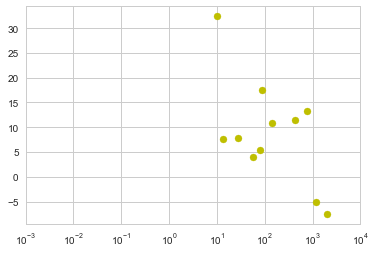

In [134]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=15, n_components=2)
data_iso = iso.fit_transform(data)
plt.scatter(data_iso[:, 0], data_iso[:, 1], c='y');

if True:
    plt.xscale('log')
    plt.xlim([1e-3,1e4])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test ,y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
#unsupervised
#classifiers
from sklearn.neighbors import KNeighborsClassifier as knnC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
#regressors
from sklearn.neighbors import KNeighborsRegressor as knnR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor as DTR

models = (knnC(),
          SVC(),
          DTC(),
          #add more    
    )

names = 'knn,svc,dtc'.split(',')

In [ ]:
#fit
classifiers = [m.fit(X_train, y_train) for m in models]
#predict
p = {n: clf.predict(X_test) for n,clf in zip(names,classifiers)}

In [ ]:
from sklearn.cross_validation import cross_val_score

cv = {n: cross_val_score(clf, X_train, y_test, cv=5) for n,clf in zip(names,classifiers)}

for n,s in zip(name,cv):
    print('{0}:\t{1:.2f},{2:.2f}'.format(n, min(s), max(s)))

In [ ]:
from sklearn.metrics  import confusion_matrix

cm = confusion_matrix(X_train, y_test)

---

The exoplanet orbit database [(Wright et al. 2011)](http://iopscience.iop.org/article/10.1086/659427/pdf)

>[Figure 2]() shows that the 3-day pileup of close-in planets is significant in the radial velocity sample and appears over-whelming in the overall sample, because of the insensitivity of most transit searches to planets with significantly longerperiod orbits (e.g., Gaudi et al. 2005; Gaudi 2005).

> Focus on only the RV-discovered planets allows us to explore the nature of the mass-period correlation ([Fig. 3](http://iopscience.iop.org/article/10.1086/659427/pdf)). Comparison of the semi-major axes of super-Jupiters and sub-Jupiters shows that the 3-day pileup is predominantly due to the population of sub-Jupiters and that super-Jupiters are rarely found in close-in orbits. The lack of an obvious 1-AU “jump” among the sub-Jupiters could easily be due to the difficulty of detecting such planets at such large orbital distances. (Wright 2011)

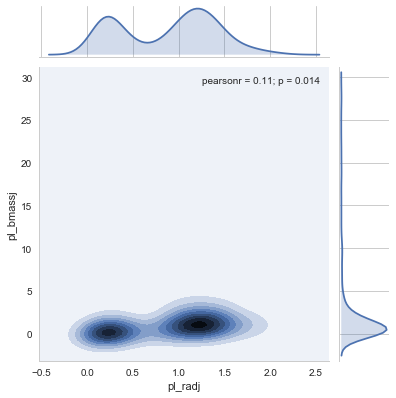

In [135]:
import seaborn as sb
#set plotting style
sb.set_style('whitegrid')


ax = sb.jointplot(x='pl_radj',y='pl_bmassj', data=rm, kind="kde")
#ax.axis(xlabel='Radius (M_J)', ylabel='Mass (M_J)')

bug: xlabel does not show; log does not render well

# Kepler's law

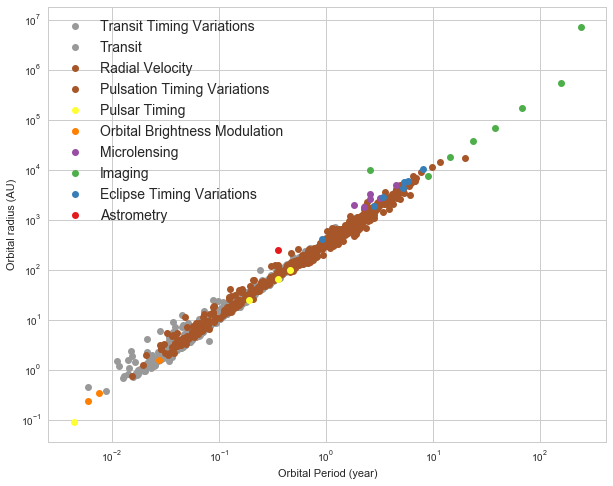

In [136]:
#set font size
plt.rcParams.update({'font.size': 18})

groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in list(zip(groups,colors))[::-1]: 
    ax.plot(group[1]['pl_orbsmax'],group[1]['pl_orbper'], 'o', color=color,
            label=group[0])#, alpha=0.3);
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Orbital Period (year)')
ax.set_ylabel('Orbital radius (AU)')
ax.legend(fontsize=14)

# Eccentric and inclined planets 

```
Q: How is it possible to have very eccentric orbits?
Q: For example, why are there mini humps in 0.3, 0.5, and 0.8 in transiting planets? 
```

In [137]:
df_ecc=df[df['pl_orbeccen'] > .1]
df_ecc.head(3)

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,pl_instrument.1,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink,pl_bmass,pl_bmassE,pl_g_E
26,HAT-P-44,c,Radial Velocity,2014,2,872.200000,1.7520,0.494,NaN,4.000,...,HIRES Spectrometer,10 m Keck I Telescope,2014-05-14,0,Hartman et al. 2014,Hartman et al. 2014,http://exoplanet.eu/catalog/hat-p-44_c/,7.594800e+27,1271.266446,NaN
28,HAT-P-46,b,Transit,2014,1,4.463129,0.0577,0.123,85.5,0.493,...,2K CCD Sensor,Canon 200mm f/1.8L,2014-05-14,0,Hartman et al. 2014,Hartman et al. 2014,http://exoplanet.eu/catalog/hat-p-46_b/,9.360591e+26,156.683589,0.756425
34,HD 142,b,Radial Velocity,2001,2,349.700000,1.0200,0.170,NaN,1.250,...,UCLES Spectrograph,3.9 m Anglo-Australian Telescope,2014-08-21,0,Wittenmyer et al. 2012,Tinney et al. 2002,http://exoplanet.eu/catalog/hd_142_b/,2.373375e+27,397.270764,NaN


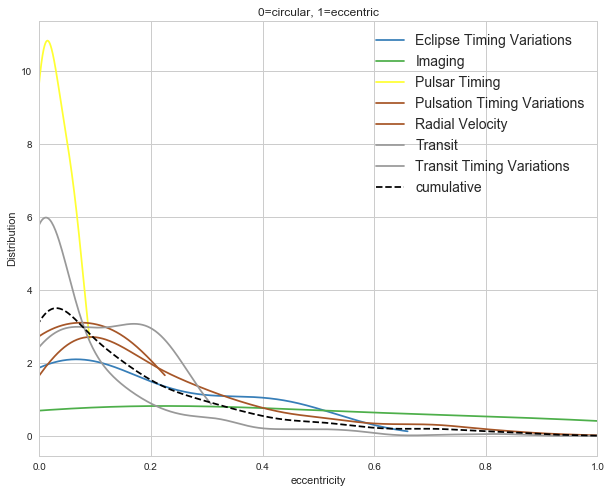

In [138]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param='pl_orbeccen'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): 
    try:
        group[1][param].dropna().plot(kind='kde', color=color,label=group[0]);#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='k', linestyle='dashed',label='cumulative');
ax.set_xlabel('eccentricity')
ax.set_ylabel('Distribution')
ax.set_xlim([0,1])
ax.legend(loc='upper right',fontsize=14)
ax.set_title('0=circular, 1=eccentric')

# Inclined planets

```
Q: How is it possible to have non-coplanar, to the extent of almost perpendicular (incl~0 deg) oblique orbits?
```

In [139]:
df_inc=df[df['pl_orbincl'] > .1]
df_inc.sort_values(by='pl_orbincl').head(3)

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,pl_instrument.1,pl_telescope,rowupdate,st_nplc,pl_def_refname,pl_disc_refname,pl_pelink,pl_bmass,pl_bmassE,pl_g_E
1578,HD 88133,b,Radial Velocity,2004,1,3.414867,0.04691,0.050,15.0,1.020,...,HIRES Spectrometer,10 m Keck I Telescope,2016-10-13,0,Piskorz et al. 2016,Fischer et al. 2005,http://exoplanet.eu/catalog/hd_88133_b/,1.936674e+27,324.172944,NaN
316,RR Cae,b,Eclipse Timing Variations,2012,1,4343.500000,5.30000,0.000,17.6,4.200,...,VersArray 1300B CCD Camera,2.15 m Jorge Sahade Telescope,2015-08-27,0,Qian et al. 2012,Qian et al. 2012,http://exoplanet.eu/catalog/rr_cae_b/,7.974540e+27,1334.829768,NaN
1222,HD 128311,b,Radial Velocity,2002,2,453.019000,1.08400,0.303,30.0,1.769,...,HIRES Spectrometer,10 m Keck I Telescope,2015-06-25,0,McArthur et al. 2014,Butler et al. 2003,http://exoplanet.eu/catalog/hd_128311_b/,3.358800e+27,562.217586,NaN


Since most transiting planets are preferentially detected in edge-on (inc=90 deg) geometry, we'll exclude them in the plot below. What's left are non-transiting but inclined planets.

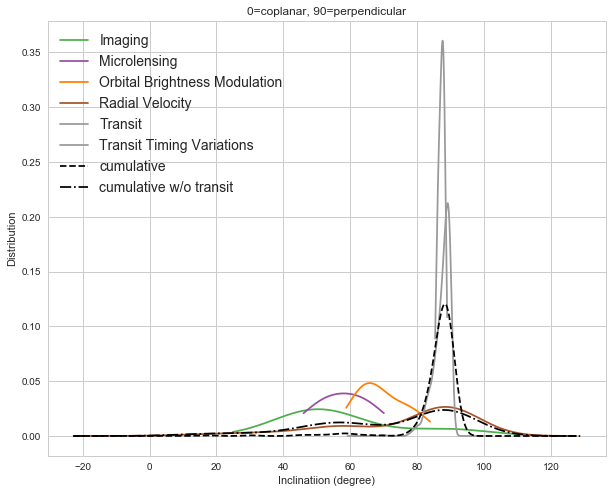

In [140]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param='pl_orbincl'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): 
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='k', linestyle='dashed',label='cumulative');
df.query('pl_discmethod !="Transit"')[param].plot(kind='kde', color='k', linestyle='dashdot',label='cumulative w/o transit');
ax.set_xlabel('Inclinatiion (degree)')
ax.set_ylabel('Distribution')
#ax.set_xlim([0,10])
ax.legend(loc='upper left',fontsize=14)
ax.set_title('0=coplanar, 90=perpendicular')

# Bulk composition: density

```
Q: Why most (transiting) planets have density between H and H2O?
Q: How can several planets have density higher than Iridium (third densest known element)?
   The observational uncertainty cannot even account for this conundrum.
Q: What are the possible internal composition for the planets between H2O and rock (including degeneracies)? 
```

The reference for density is [here](https://en.wikipedia.org/wiki/Density).

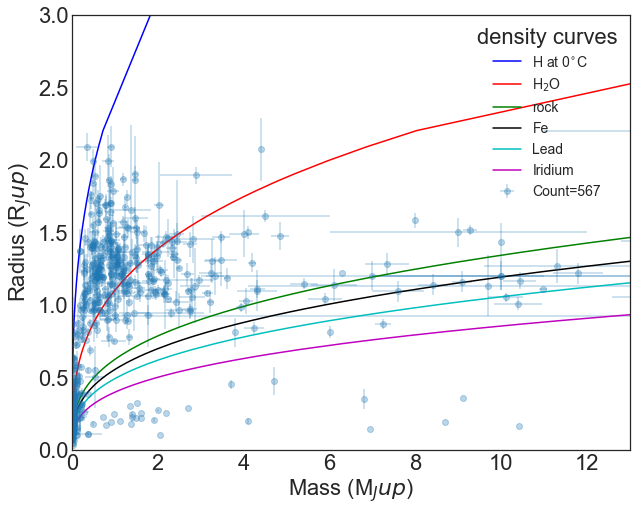

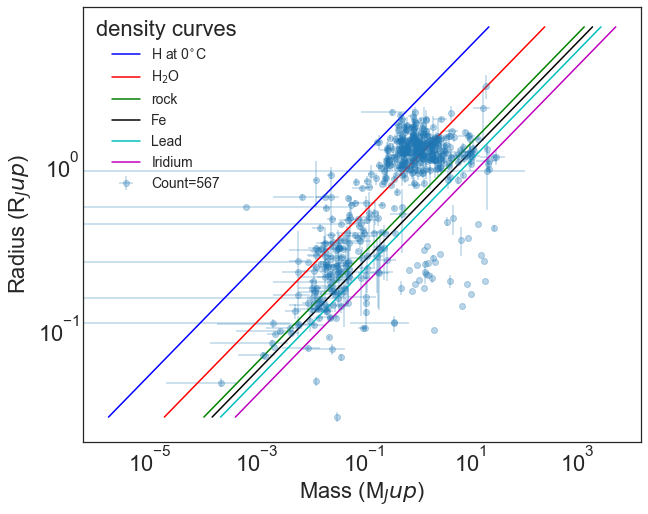

In [17]:
import numpy as np

mass_h2O, mass_Fe, mass_rock, mass_H, mass_lead, mass_iridium  = [],[],[],[],[], []

rho_h2O, rho_Fe, rho_rock, rho_H, rho_lead, rho_iridium = 1000, 7874, 5510, 89.88, 11340, 21450 #kg/m3
Mjup,Rjup=1.898e27,6.9911e7

#6.e24, /(R_Earth*1000)

rad = df['pl_radj'].sort_values()
for r in rad*Rjup:
    mass_h2O.append(4./3.*np.pi*rho_h2O*(r)**3) #kg
    mass_Fe.append(4./3.*np.pi*rho_Fe*(r)**3) #kg
    mass_rock.append(4./3.*np.pi*rho_rock*(r)**3) #kg
    mass_H.append(4./3.*np.pi*rho_H*(r)**3) #kg
    mass_lead.append(4./3.*np.pi*rho_lead*(r)**3) #kg
    mass_iridium.append(4./3.*np.pi*rho_iridium*(r)**3) #kg

count=len(df.query('pl_radj > 0 and pl_bmassj > 0'))

fig, ax1 = plt.subplots(1,1,figsize=(10,8))
errbar = ax1.errorbar(x=df['pl_bmassj'], y=df['pl_radj'], 
             xerr=df['pl_bmassjerr1'], yerr=df['pl_radjerr1'],
             fmt='o', alpha=0.3, label='Count={}'.format(count))
#plt.xlim([0,13])
#plt.ylim([0,3])

masses=[mass_H,mass_h2O,mass_rock,mass_Fe,mass_lead,mass_iridium]
labels = ['H at 0$^{\circ}$C','H$_2$O','rock','Fe','Lead','Iridium']
colors=['b-','r-','g-','k-','c-','m-']

for m,c,label in zip(masses,colors,labels):
     ax1.plot(np.array(m)/Mjup, rad, c,label=label)
ax1.set_xlim([0,13])
ax1.set_ylim([0,3])
ax1.set_xlabel('Mass (M$_Jup$)')
ax1.set_ylabel('Radius (R$_Jup$)')
ax1.legend(title='density curves', fontsize=14)

#############LOGGED###################

fig, ax2 = plt.subplots(1,1,figsize=(10,8))
ax2.errorbar(x=df['pl_bmassj'], y=df['pl_radj'], 
             xerr=df['pl_bmassjerr1'], yerr=df['pl_radjerr1'],fmt='o', 
             alpha=0.3, label='Count={}'.format(count))

for m,c,label in zip(masses,colors,labels):
     ax2.plot(np.array(m)/Mjup, rad, c,label=label)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.axis('tight')
ax2.set_xlabel('Mass (M$_Jup$)')
ax2.set_ylabel('Radius (R$_Jup$)')
ax2.legend(title='density curves', fontsize=14)

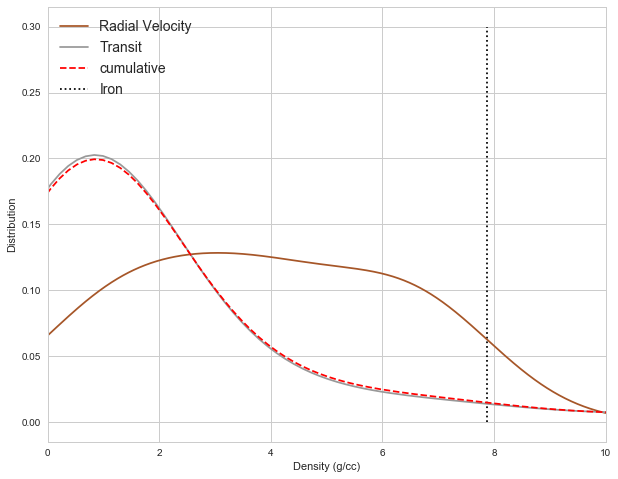

In [142]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param='pl_dens'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): 
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
plt.vlines(7.874,0, 0.3, linestyles='dotted', label='Iron')
ax.set_xlabel('Density (g/cc)')
ax.set_ylabel('Distribution')
ax.set_xlim([0,10])
#ax.set_xscale('log')
ax.legend(loc='upper left',fontsize=14)

# Planet equilibrium temperature

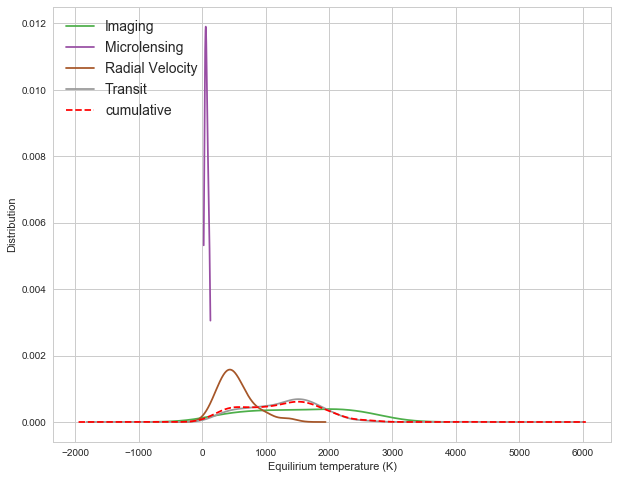

In [143]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param='pl_eqt'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): 
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
ax.set_xlabel('Equilirium temperature (K)')
ax.set_ylabel('Distribution')
#ax.set_xlim([0,10])
#ax.set_xscale('log')
ax.legend(loc='upper left',fontsize=14)

# Earth-like planets?

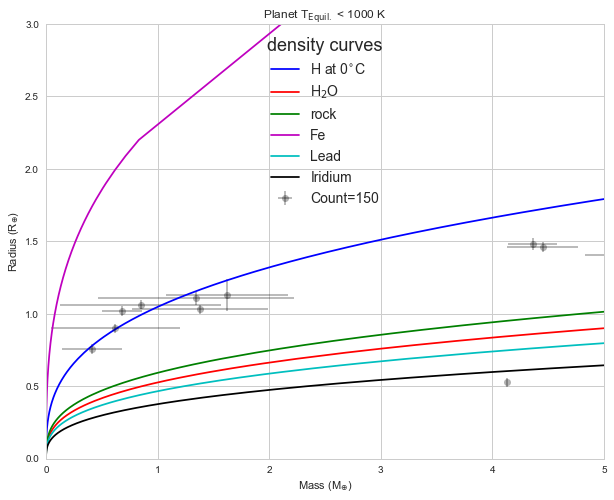

In [144]:
import numpy as np
import mpld3
mpld3.enable_notebook()

from mpld3 import plugins

mass_h2O, mass_Fe, mass_rock, mass_H, mass_lead, mass_iridium  = [],[],[],[],[], []
masses=[mass_h2O, mass_Fe, mass_rock, mass_H, mass_lead, mass_iridium]

rho_h2O, rho_Fe, rho_rock, rho_H, rho_lead, rho_iridium = 1000, 7874, 5510, 89.88, 11340, 21450 #kg/m3
densities=[rho_h2O, rho_Fe, rho_rock, rho_H, rho_lead, rho_iridium]

Mjup,Rjup = 1.898e27,6.9911e7
M_E,R_E = 5.972e24, 6.371e6

rad = df['pl_radj'].sort_values()
for m,d in zip(masses,densities):
    for r in rad*Rjup/R_E:
        m.append(4./3.*np.pi* d *(r)**3) #kg

#eta Earth
eta = df.query('pl_eqt != "NaN" and pl_eqt < 1000')
count = len(eta)

fig, ax = plt.subplots(1,1,figsize=(10,8))
errbar = ax.errorbar(x=eta['pl_bmassj']*Mjup/M_E, y=eta['pl_radj']*Rjup/R_E, 
             xerr=eta['pl_bmassjerr1']*Mjup/M_E, 
             yerr=eta['pl_radjerr1']*Rjup/R_E,
             fmt='ko', alpha=0.3, 
             label='Count={}'.format(count))

labels=['H at 0$^{\circ}$C', 'H$_2$O', 'rock', 'Fe', 'Lead', 'Iridium']
styles='b-,r-,g-,m-,c-,k-'.split(',')
for m,s,l in zip(masses,styles,labels):
    ax.plot(np.array(m)/R_E, rad, s,label=l)

#plt.xscale('log')
#plt.yscale('log')
ax.set_xlim([0,5])
ax.set_ylim([0,3])
ax.set_xlabel('Mass (M$_{\oplus}$)')
ax.set_ylabel('Radius (R$_{\oplus}$)')
ax.set_title('Planet T$_{\mathrm{Equil.}}$ < 1000 K')
ax.legend(title='density curves', fontsize=14)

#add interactive tooltips
labels = ['{0} {1}'.format(i,j) for i,j in zip(eta['pl_hostname'],eta['pl_letter'])]
fig.plugins = [plugins.PointLabelTooltip(errbar, labels)]

mpld3.disable_notebook()

![Trappist planets](figures/trappist-1 planets.png)

## Who are they?

In [145]:
df.columns

Index([u'pl_hostname', u'pl_letter', u'pl_discmethod', u'pl_disc', u'pl_pnum',
       u'pl_orbper', u'pl_orbsmax', u'pl_orbeccen', u'pl_orbincl',
       u'pl_bmassj', u'pl_radj', u'pl_radjerr1', u'pl_radjerr2', u'pl_dens',
       u'pl_instrument', u'pl_insol', u'pl_eqt', u'pl_bmassjerr1',
       u'pl_bmassjerr2', u'pl_bmassjerr1.1', u'pl_bmassjerr2.1',
       u'pl_orbpererr1', u'pl_orbpererr2', u'st_optmag', u'ra', u'dec',
       u'st_dist', u'st_teff', u'st_mass', u'st_rad', u'st_plx', u'gaia_plx',
       u'gaia_dist', u'st_pm', u'gaia_pm', u'st_radv', u'st_spstr', u'st_logg',
       u'st_lum', u'st_dens', u'st_metfe', u'st_age', u'st_acts', u'st_bmvj',
       u'st_jmh2', u'pl_instrument.1', u'pl_telescope', u'rowupdate',
       u'st_nplc', u'pl_def_refname', u'pl_disc_refname', u'pl_pelink',
       u'pl_bmass', u'pl_bmassE', u'pl_g_E'],
      dtype='object')

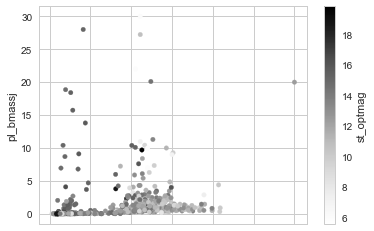

In [146]:
df.plot(x='pl_radj',y='pl_bmassj',c='st_optmag',kind='scatter')

In [71]:
eta['pl_hostname'].values

array(['HAT-P-54', 'HATS-6', 'Kepler-20', 'Kepler-20', 'Kepler-22',
       'HIP 116454', 'K2-3', 'HAT-P-11', 'Kepler-10', 'Kepler-36',
       'Kepler-36', 'Kepler-38', 'Kepler-39', 'Kepler-42', 'Kepler-42',
       'Kepler-42', 'Kepler-46', 'Kepler-51', 'Kepler-51', 'Kepler-51',
       'Kepler-62', 'Kepler-62', 'Kepler-62', 'Kepler-62', 'Kepler-69',
       'Kepler-69', 'PH2', 'Kepler-87', 'KOI-94', 'Kepler-75', 'HD 219134',
       'K2-26', 'Kepler-167', 'Kepler-167', 'HATS-17', 'TRAPPIST-1',
       'TRAPPIST-1', 'TRAPPIST-1', 'K2-4', 'K2-5', 'K2-5', 'K2-7', 'K2-8',
       'K2-9', 'K2-19', 'K2-19', 'K2-14', 'K2-15', 'K2-16', 'K2-17',
       'K2-18', 'GJ 3021', 'HD 7924', 'HD 7924', 'HAT-P-12', 'HAT-P-15',
       'HAT-P-17', 'HAT-P-18', 'CFBDSIR J145829+101343', 'Kepler-167',
       'Kepler-167', 'HD 20794', 'HD 20794', 'CoRoT-10', 'CoRoT-24',
       'HD 164922', 'Kepler-117', 'Kepler-117', 'HD 85512', 'HD 330075',
       'HD 192310', 'K2-28', 'K2-32', 'K2-32', 'K2-32', 'Kepler-130',
    

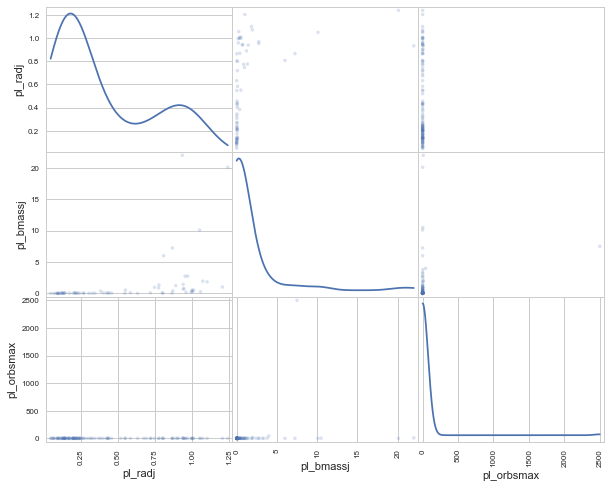

In [47]:
try:
    from pandas.plotting import scatter_matrix
except:
    from pandas.tools.plotting import scatter_matrix
    
scatter_matrix(eta[['pl_radj', 'pl_bmassj', 'pl_orbsmax']], alpha=0.2, diagonal='kde', figsize=(10,8));

# Habitable zone (Predicted)

The Habitable Zone (HZ) is the region around a star in which water can exist in liquid form.

The Exoplanet Archive stores HZ values derived using the algorithm described by [Kasting et al. (1993)](http://adsabs.harvard.edu/cgi-bin/nph-bib_query?bibcode=1993Icar..101..108K). The algorithm calculates the inner and outer boundaries of the habitable zone based on the effective temperature and luminosity of the parent star. For example, the HZ for the Sun is approximately 0.7-1.0 AU. 

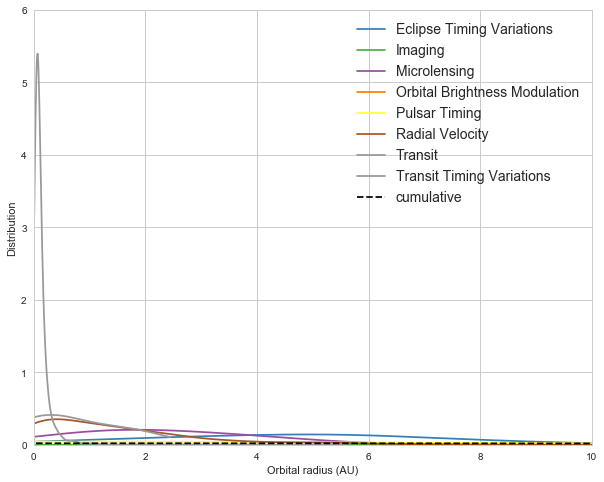

In [49]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param='pl_orbsmax'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='k', linestyle='dashed',label='cumulative')
ax.set_ylabel('Distribution')
ax.set_xlabel('Orbital radius (AU)')
ax.set_ylim([0,6])
ax.set_xlim([0,10])
#ax.set_xscale('log')
ax.legend(fontsize=14)

# Insolation Flux

[Insolation Flux](https://exoplanetarchive.ipac.caltech.edu/docs/poet_calculations.html)
```
Q: Why insolation flux is mostly derived from RV technique.
```

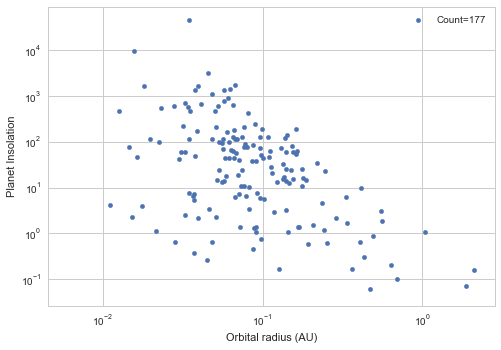

In [50]:
count=len(df['pl_insol'].dropna())
ax = df.plot.scatter(x='pl_orbsmax',y='pl_insol',label='Count={}'.format(count))
ax.set_yscale('log')
ax.set_xscale('log')
ax.axis('tight')
ax.set_ylabel('Planet Insolation')
ax.set_xlabel('Orbital radius (AU)')

# Stellar age
```
Q: Why directly imaged planets are found around ~1 Gyr host stars? 
A: Young planets (around recently-formed stars) are self-luminous such that they are bright in the infrared and hence easier to image directly.

Q: Why RV planets have broader dispersion in age? 
```

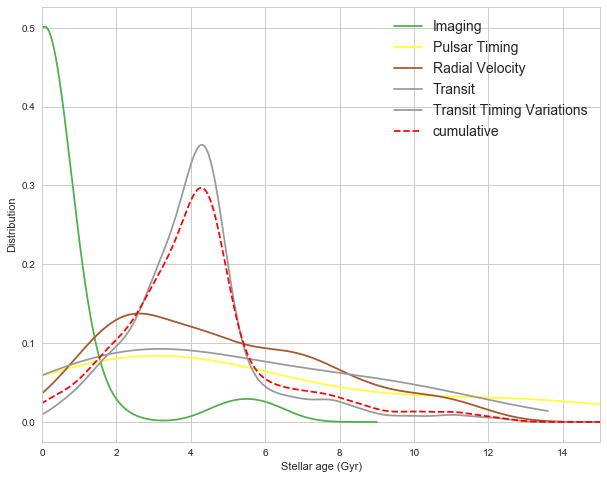

In [51]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        group[1]['st_age'].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df['st_age'].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
ax.set_ylabel('Distribution')
ax.set_xlabel('Stellar age (Gyr)')
ax.set_xlim([0,15])
ax.legend(fontsize=14)

# Stellar effective temperature

```
Q: Why planets around solar-type (~5-6k K) stars are so common?
Q: Why is there a second hump towards hotter host stars for DI planets?
Q: Why is there a second hump towards cooler (e.g. red dwarfs) host stars for RV planets?
```

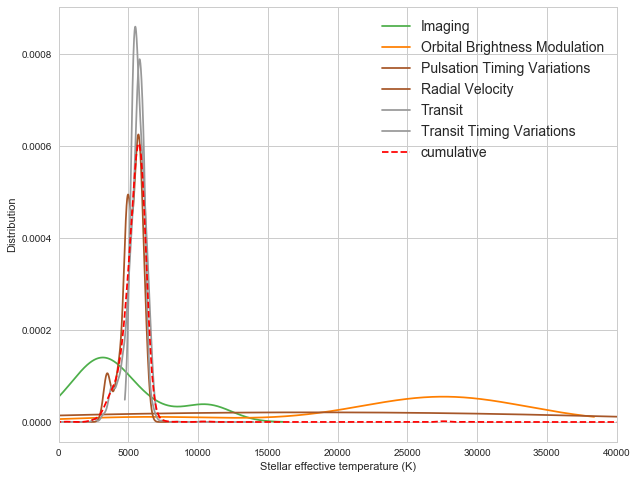

In [52]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param = 'st_teff'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
ax.set_ylabel('Distribution')
ax.set_xlabel('Stellar effective temperature (K)')
ax.set_xlim([0,4e4])
ax.legend(fontsize=14)

# Stellar activity

Chromospheric activity as measured by the S-index (ratio of the emission of the H and K Ca lines to that in nearby continuum).

```
Q: What are the effects of stellar activity on short-period (RV) planets?
```

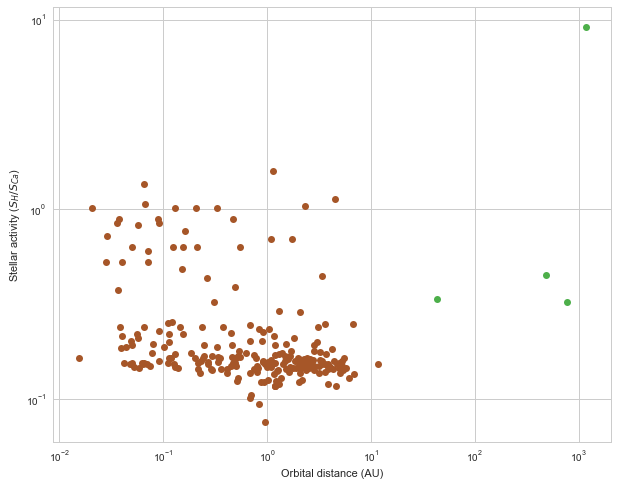

In [53]:
fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        ax.plot(group[1]['pl_orbsmax'],group[1]['st_acts'], 'o', color=color,label=group[0]);#, alpha=0.3);
    except Exception:
        pass
ax.set_xlabel('Orbital distance (AU)')
ax.set_ylabel('Stellar activity ($S_H/S_{Ca}$)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis('tight');
#ax.legend(['RV','Imaging'],fontsize=14)

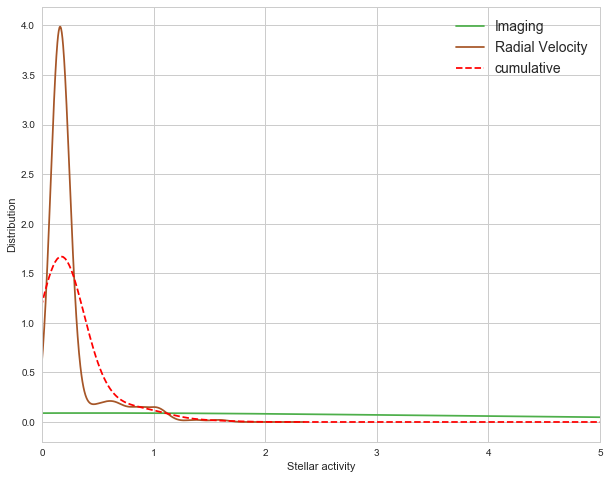

In [54]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param = 'st_acts'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
ax.set_ylabel('Distribution')
ax.set_xlabel('Stellar activity')
ax.set_xlim([0,5])
ax.legend(fontsize=14)

# Color

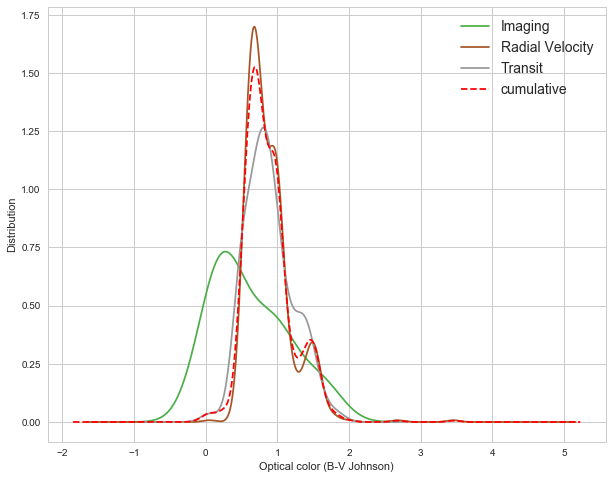

In [55]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param = 'st_bmvj'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
ax.set_ylabel('Distribution')
ax.set_xlabel('Optical color (B-V Johnson)')
#ax.set_xlim([0,5])
ax.legend(fontsize=14)

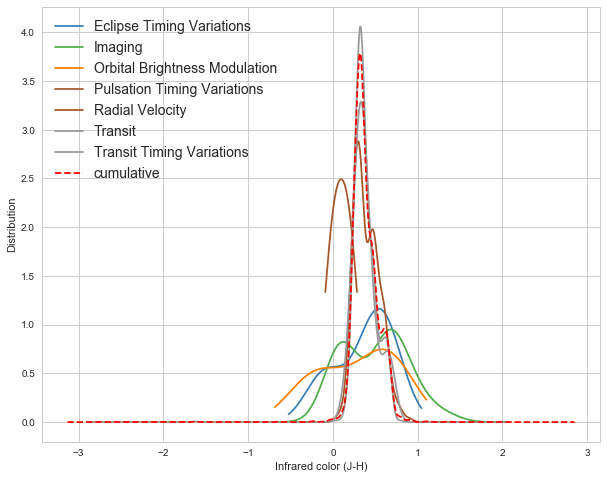

In [56]:
groups =  df.groupby(by='pl_discmethod')
colors = cm.Set1(np.linspace(0, 1, len(groups)))

param = 'st_jmh2'

fig, ax = plt.subplots(1,1,figsize=(10,8))
for group,color in zip(groups,colors): #plot in reverse order for visual clarity
    try:
        group[1][param].plot(kind='kde', color=color,label=group[0])#, alpha=0.3);
    except Exception:
        pass
df[param].plot(kind='kde', color='r', linestyle='dashed',label='cumulative')
ax.set_ylabel('Distribution')
ax.set_xlabel('Infrared color (J-H)')
#ax.set_xlim([0,5])
ax.legend(fontsize=14)

## Questions
### How many have stars have multiple planets detected?

In [57]:
df['pl_hostname'].value_counts().head()

KOI-351       7
TRAPPIST-1    7
HD 10180      6
Kepler-20     6
Kepler-11     6
Name: pl_hostname, dtype: int64

### Planet in mean motion resonance

Few multiplanetary systems are known to be in mean motion resonance. The longest system in near-resonance is TRAPPIST-1 (Gillon et al. 2017). Another is Kepler 223 which Mills et al. (2016) propsed to be a by-product of inward migration. How many system have mean motion resonances and are these systems' architectures similar or different? Does these systems have inner planet (or outer planet) that might indicate migration?    

In [58]:
#non-unique names of multiplanet systems; e.g. HR8799 has 4 entries for b,c,d,e
df['pl_pnum'].value_counts()

1    2029
2     764
3     375
4     192
5     100
6      24
7      14
Name: pl_pnum, dtype: int64

In [59]:
#unique names of multiplanet systems
multiple_system = df['pl_hostname'].value_counts()#.index

multiple_system[:5]

KOI-351       7
TRAPPIST-1    7
HD 10180      6
Kepler-20     6
Kepler-11     6
Name: pl_hostname, dtype: int64

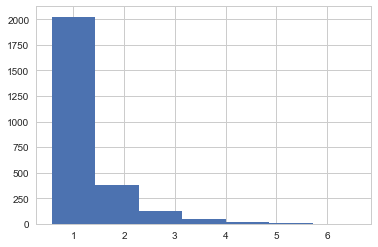

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
#multiple_system.plot(bins=6,kind='hist', normed=True)
plt.hist(multiple_system, bins=7, align='left');

### Sample

see also KOI-351

In [61]:
from fractions import Fraction as F

#must be sorted accdg to planet letter
var=df.query('pl_hostname == "TRAPPIST-1"').sort_values('pl_letter')
a=var.pl_orbper.values
err=max(var.pl_orbpererr1.values)
#count sig fig
SF = len(str(err)) -1 
print('ratio of neighbor orbits:\n')
for i in range(len(a)-1):
    ans=a[i+1]/a[i]
    print('{0:.4f}; {1}'.format(ans, F(ans))) #SF=.4

ratio of neighbor orbits:

1.6029; 7218964347744057/4503599627370496
1.6721; 1882654082050065/1125899906842624
1.5062; 3391712268725073/2251799813685248
1.5094; 3398841209921911/2251799813685248
1.3417; 3021319061515599/2251799813685248
1.5192; 1710504831377431/1125899906842624


Kepler-223--known in near-resonance

In [62]:
a=df.query('pl_hostname == "Kepler-223"').sort_values('pl_letter').pl_orbper.values
for i in range(len(a)-1):
    print(a[i+1]/a[i])

1.33328638809
1.50205471661
1.33383484271


### YSOs with outer planet

In [63]:
yso = df.query('10 < pl_orbsmax < 1000 and st_age < 0.01')
yso.pl_discmethod.value_counts()

Imaging    13
Name: pl_discmethod, dtype: int64

In [64]:
yso.head(3)

,pl_hostname,pl_letter,pl_discmethod,pl_disc,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_orbincl,pl_bmassj,...,st_acts,st_bmvj,st_jmh2,pl_instrument.1,pl_telescope,rowupdate,st_nplc,pl_bmass,pl_bmassE,pl_g_E
429,HIP 78530,b,Imaging,2010,1,NaN,740.0,NaN,NaN,23.0,...,NaN,0.077,-0.018,NIRI Camera,8.19 m Gemini North Telescope,2015-04-01,0,4.367010e+28,7309.782063,NaN
1368,DH Tau,b,Imaging,2004,1,NaN,330.0,NaN,NaN,11.0,...,NaN,NaN,0.943,CIAO Camera,8.2 m Subaru Telescope,2014-05-14,0,2.088570e+28,3495.982726,NaN
1447,HD 100546,b,Imaging,2014,1,NaN,53.0,NaN,NaN,NaN,...,NaN,0.003,0.463,NACO Camera,8.2 m ESO VLT UT4 Yepun Telescope,2015-05-14,0,NaN,NaN,NaN


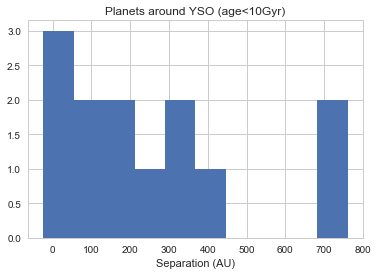

In [65]:
#yso['pl_orbsmax'].plot(bins=10, kind='hist')
plt.hist(yso['pl_orbsmax'], bins=10, align='left');
plt.title('Planets around YSO (age<10Gyr)')
plt.xlabel('Separation (AU)')

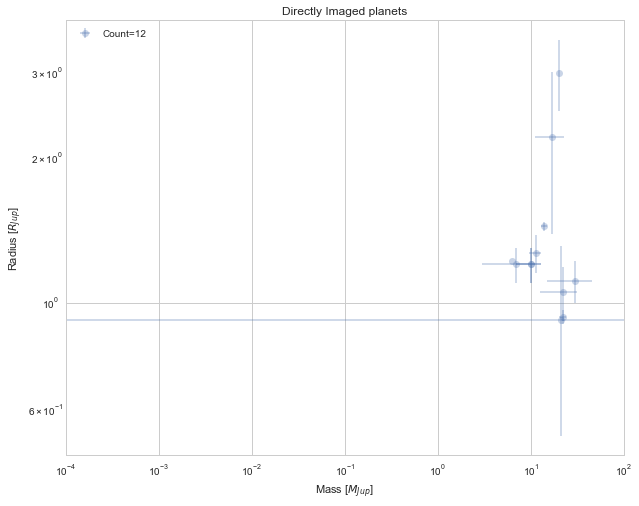

In [66]:
df_DI = groups.get_group('Imaging')

DI_count = len(df_DI.query('pl_radj > 0 and pl_bmassj > 0 and pl_radj > 0'))

fig, ax = plt.subplots(1,1,figsize=(10,8))
ax.errorbar(x=df_DI['pl_bmassj'], y=df_DI['pl_radj'], xerr=df_DI['pl_bmassjerr1'], 
             yerr=df_DI['pl_radjerr1'],fmt='o', alpha=0.3, label='Count={}'.format(DI_count))


ax.set_xlabel('Mass [$M_{Jup}$]')
ax.set_ylabel('Radius [$R_{Jup}$]')
ax.set_xlim([1e-4,1e2])
ax.set_title('Directly Imaged planets')

if True:
    ax.set_xscale('log')
    ax.set_yscale('log')
    
leg = plt.legend(fancybox=True, loc=2, numpoints = 1, fontsize=10)
leg.get_frame().set_alpha(0.5)

### Density-based colormap

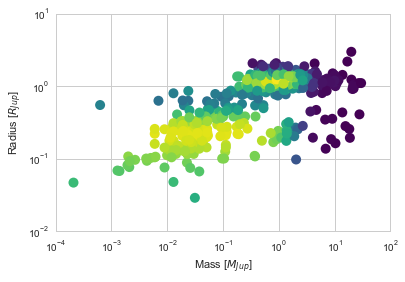

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

x=df[['pl_radj', 'pl_bmassj']].dropna()['pl_bmassj'].values
y=df[['pl_radj', 'pl_bmassj']].dropna()['pl_radj'].values

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100, edgecolor='', cmap='viridis')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-4,1e2])
ax.set_ylim([1e-2,1e1])

plt.xlabel('Mass [$M_{Jup}$]')
plt.ylabel('Radius [$R_{Jup}$]')

# Pre-processing?

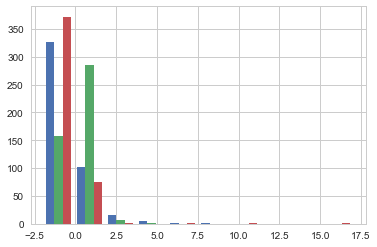

In [68]:
#http://scikit-learn.org/stable/modules/preprocessing.html
from sklearn import preprocessing
import numpy as np

data=df[['pl_bmassj','pl_radj','pl_orbsmax']].dropna() #3D

#ax.scatter3D(data.pl_bmassj, data.pl_radj, data.pl_orbsmax, c='r') #color by labels later

data_scaled = preprocessing.scale(data)
plt.hist(data_scaled);

In [69]:
'''
StandardScaler implements the Transformer API to compute the mean and standard deviation on a training set 
so as to be able to later reapply the same transformation on the testing set.
'''

scaler = preprocessing.StandardScaler().fit(data)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
scaler.mean_  
scaler.scale_ 

array([   3.63982736,    0.48564514,  116.72654834])

In [71]:
scaler.transform(data)

array([[-0.28942599,  0.18597796, -0.09134317],
       [-0.30783346,  0.66575214, -0.09155563],
       [ 0.09328447,  0.10979064, -0.0914434 ],
       ..., 
       [-0.16799166,  0.15097297, -0.09149138],
       [-0.49273234, -1.19774845, -0.09112642],
       [-0.27239222,  2.00417799, -0.09110243]])

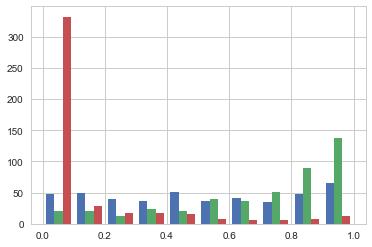

In [72]:
#normalization
data_normalized = preprocessing.normalize(data, norm='l2')

plt.hist(data_normalized);

In [73]:
#useful constants
M_E = 5.972e24 #kg
a_E = 149.60e6 #m 
R_E = 6371e3 #km
P_E = 365 #d

M_J = 1.898e27 #kg
a_J = 778.57e6 #m
R_J = 69911e3 #m
P_J = 11.86*P_E

M_N = 1.024e26
a_N = 4495.06e6 #m
R_N = 24622e3 #m
P_N = 164.8*P_E

Alternatively, there are libraries such as `astropy` that have built in constants. This is especially useful for unit conversion. 

In [74]:
from astropy import constants as const

M_J = const.M_jup #kg
R_J = const.R_jup #m

M_E = const.M_earth
R_E = const.R_earth

In [75]:
M_J.si, M_J.cgs

(<Constant name=u'Jupiter mass' value=1.8987e+27 uncertainty=5e+22 unit='kg' reference=u"Allen's Astrophysical Quantities 4th Ed.">,
 <Quantity 1.8987e+30 g>)